##Import Library

In [ ]:
import math

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn as sklearn

##### Setting

In [ ]:
# Set display option to show two decimal places
pd.options.display.float_format = "{:.2f}".format

In [ ]:
# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

##Read Dataset

In [ ]:
df = pd.read_csv('/content/new_data_steal_plates_fault.csv')
df

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Type_of_Steel,label
0,42,50,270900,270944,267.00,17,44,24220.00,76,108,1687,80,0.05,0.24,0.18,0.00,0.47,1.00,1.00,2.43,0.90,1.64,0.82,-0.29,0.58,A300,Pastry
1,645,651,2538079,2538108,108.00,10,30,11397.00,84,123,1687,80,0.76,0.38,0.21,0.00,0.60,0.97,1.00,2.03,0.78,1.46,0.79,-0.18,0.30,A300,Pastry
2,829,835,1553913,1553931,71.00,8,19,7972.00,99,125,1623,100,0.97,0.34,0.33,0.00,0.75,0.95,1.00,1.85,0.78,1.26,0.67,-0.12,0.21,A300,Pastry
3,853,860,369370,369415,176.00,13,45,18996.00,99,126,1353,290,0.73,0.44,0.16,0.01,0.54,1.00,1.00,2.25,0.85,1.65,0.84,-0.16,0.52,A400,Pastry
4,1289,1306,498078,498335,1893.88,60,260,206312.15,37,126,1353,185,0.07,0.45,0.07,0.01,0.28,0.99,1.00,3.38,1.23,2.41,0.93,-0.20,1.00,A400,Pastry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,249,277,325780,325796,273.00,54,22,35033.00,119,141,1360,40,0.37,0.39,0.57,0.02,0.52,0.73,0.00,2.44,1.45,1.20,-0.43,0.00,0.73,A400,Other Faults
1937,144,175,340581,340598,287.00,44,24,34599.00,112,133,1360,40,0.21,0.46,0.55,0.02,0.70,0.71,0.00,2.46,1.49,1.23,-0.45,-0.06,0.82,A400,Other Faults
1938,145,174,386779,386794,292.00,40,22,37572.00,120,140,1360,40,0.21,0.33,0.52,0.02,0.72,0.68,0.00,2.47,1.46,1.18,-0.48,0.01,0.71,A400,Other Faults
1939,137,170,422497,422528,419.00,97,47,52715.00,117,140,1360,40,0.20,0.59,0.94,0.02,0.34,0.66,0.00,2.62,1.52,1.49,-0.06,-0.02,0.99,A400,Other Faults


##Understanding and Preprocessing Dataset

###Cek Data Type

In [ ]:
#cek data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     1941 non-null   int64  
 1   X_Minimum              1941 non-null   int64  
 2   X_Maximum              1941 non-null   int64  
 3   Y_Minimum              1941 non-null   int64  
 4   Y_Maximum              1941 non-null   int64  
 5   Pixels_Areas           1941 non-null   int64  
 6   X_Perimeter            1941 non-null   int64  
 7   Y_Perimeter            1941 non-null   int64  
 8   Sum_of_Luminosity      1941 non-null   int64  
 9   Minimum_of_Luminosity  1941 non-null   int64  
 10  Maximum_of_Luminosity  1941 non-null   int64  
 11  Length_of_Conveyer     1941 non-null   int64  
 12  TypeOfSteel_A300       1941 non-null   int64  
 13  TypeOfSteel_A400       1941 non-null   int64  
 14  Steel_Plate_Thickness  1941 non-null   int64  
 15  Edge

###Deskripsi Statistika Data


In [ ]:
#describe data
df.describe()

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
count,1941.00,1941.00,1941.00,1941.00,1941.00,1941.00,1941.00,1941.00,1941.00,1941.00,1941.00,1941.00,1941.00,1941.00,1941.00,1941.00,1941.00,1941.00,1941.00,1941.00,1941.00,1941.00,1941.00,1941.00,1941.00,1941.00,1941.00,1941.00,1941.00,1941.00,1941.00,1941.00,1941.00,1941.00,1941.00
mean,971.00,571.14,617.96,1650684.87,1650738.71,1893.88,111.86,82.97,206312.15,84.55,130.19,1459.16,0.40,0.60,78.74,0.33,0.41,0.57,0.03,0.61,0.81,0.58,2.49,1.34,1.40,0.08,-0.13,0.59,0.08,0.10,0.20,0.04,0.03,0.21,0.35
std,560.46,520.69,497.63,1774578.41,1774590.09,5168.46,301.21,426.48,512293.59,32.13,18.69,144.58,0.49,0.49,55.09,0.30,0.14,0.27,0.06,0.24,0.23,0.48,0.79,0.48,0.45,0.50,0.15,0.34,0.27,0.30,0.40,0.19,0.17,0.41,0.48
min,1.00,0.00,4.00,6712.00,6724.00,2.00,2.00,1.00,250.00,0.00,37.00,1227.00,0.00,0.00,40.00,0.00,0.00,0.01,0.00,0.01,0.05,0.00,0.30,0.30,0.00,-0.99,-1.00,0.12,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,486.00,51.00,192.00,471253.00,471281.00,84.00,15.00,13.00,9522.00,63.00,124.00,1358.00,0.00,0.00,40.00,0.06,0.32,0.36,0.01,0.41,0.60,0.00,1.92,1.00,1.08,-0.33,-0.20,0.25,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,971.00,435.00,467.00,1204128.00,1204136.00,174.00,26.00,25.00,19202.00,90.00,127.00,1364.00,0.00,1.00,70.00,0.23,0.41,0.56,0.01,0.64,0.95,1.00,2.24,1.18,1.32,0.10,-0.13,0.51,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,1456.00,1053.00,1072.00,2183073.00,2183084.00,822.00,84.00,83.00,83011.00,106.00,140.00,1650.00,1.00,1.00,80.00,0.57,0.50,0.82,0.02,0.80,1.00,1.00,2.91,1.52,1.73,0.51,-0.07,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
max,1941.00,1705.00,1713.00,12987661.00,12987692.00,152655.00,10449.00,18152.00,11591414.00,203.00,253.00,1794.00,1.00,1.00,300.00,1.00,0.94,1.00,0.88,1.00,1.00,1.00,5.18,3.07,4.26,0.99,0.64,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


###Missing Value

In [ ]:
#cek missing value
df.isnull().sum()

,0
id,0
X_Minimum,0
X_Maximum,0
Y_Minimum,0
Y_Maximum,0
Pixels_Areas,0
X_Perimeter,0
Y_Perimeter,0
Sum_of_Luminosity,0
Minimum_of_Luminosity,0


Nothing missing value in dataset

###Duplicate Data

In [ ]:
#cek duplicate data
df.duplicated().sum()

0

Nothing duplicate in dataset

###Unique Data

In [ ]:
#cek unique data
df.nunique()

,0
id,1941
X_Minimum,962
X_Maximum,994
Y_Minimum,1939
Y_Maximum,1940
Pixels_Areas,920
X_Perimeter,399
Y_Perimeter,317
Sum_of_Luminosity,1909
Minimum_of_Luminosity,161


###Feature Engineering

#### Drop id

In [ ]:
#drop column id
df = df.drop('id', axis=1)

###Outlier

In [ ]:
#cek outlier

def detect_and_plot_outliers(df):
    # Menghitung IQR dan mendeteksi outlier
    outliers = pd.DataFrame()
    for col in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers_in_col = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outliers = pd.concat([outliers, outliers_in_col])

    # Membuat box plot untuk setiap kolom numerik
    df.select_dtypes(include=['float64', 'int64']).boxplot(figsize=(10, 8))
    plt.xticks(rotation=90)
    plt.show()

    return outliers

In [ ]:
# Select numeric columns
numeric_df = df.select_dtypes(include=['number'])

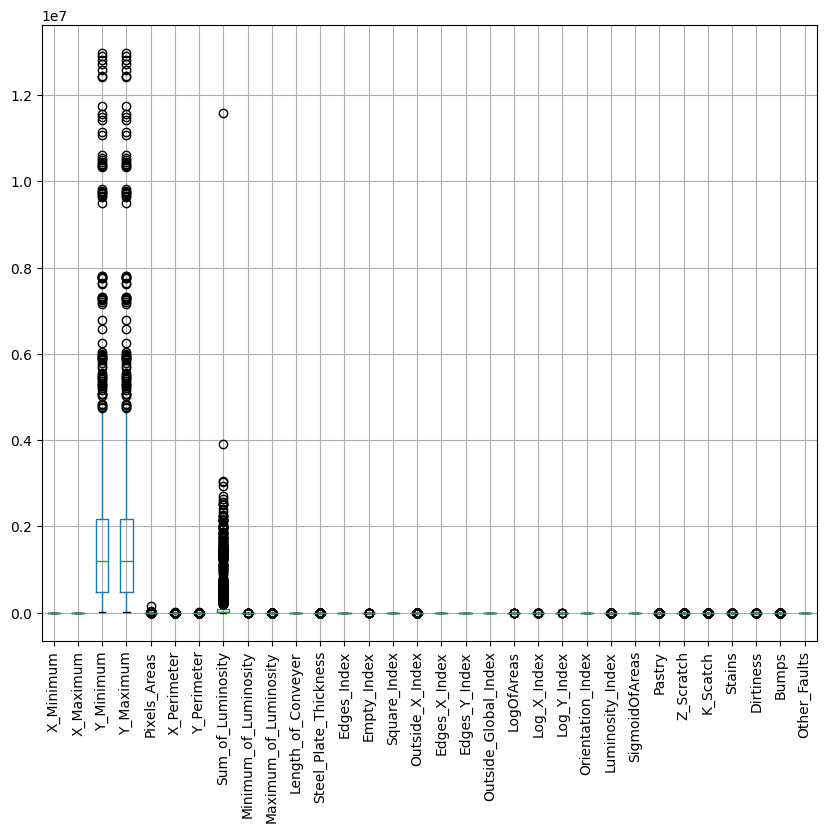

In [ ]:
# Detection and show the plot of outlier
outliers = detect_and_plot_outliers(numeric_df)

In [ ]:
#Handling Outlier
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats.mstats import winsorize

def show_boxplot(df, title="Boxplot", max_cols_per_plot=9):
    """
    Display a boxplot of the columns in the DataFrame, showing a maximum of 10 columns per plot.

    Parameters:
    - df: DataFrame containing the data.
    - title: Title for the boxplot.
    - max_cols_per_plot: Maximum number of columns to display in a single plot.
    """
    num_columns = df.shape[1]
    num_plots = int(np.ceil(num_columns / max_cols_per_plot))

    for i in range(num_plots):
        start_col = i * max_cols_per_plot
        end_col = min((i + 1) * max_cols_per_plot, num_columns)
        df_subset = df.iloc[:, start_col:end_col]

        # Display boxplot for the current subset of columns
        df_subset.plot(kind='box', subplots=True, layout=(int(np.ceil(len(df_subset.columns)/3)), 3), figsize=(15, 10))
        plt.suptitle(f'{title} (Columns {start_col+1} to {end_col})')
        plt.show()

def handle_outliers(df, threshold=3, method='median', show='before'):
    """
    Handle outliers in a DataFrame by replacing them with the specified method.

    Parameters:
    - df: DataFrame containing the data.
    - threshold: Z-score threshold for identifying outliers (default is 3).
    - method: Method for replacing outliers ('median', 'mean', or 'winsorize').
    - show: Whether to display boxplot for 'before' or 'after' outlier handling. Default is 'before'.

    Returns:
    - DataFrame with outliers replaced according to the specified method.
    """
    if show == 'before':
        show_boxplot(df, title='Boxplot of Columns Before Outlier Handling')

    for column in df.columns:
        if np.issubdtype(df[column].dtype, np.number):
            z_scores = np.abs((df[column] - df[column].mean()) / df[column].std())

            if method == 'median':
                replace_value = df[column].median()
            elif method == 'mean':
                replace_value = df[column].mean()
            elif method == 'winsorize':
                winsorized_values = winsorize(df[column], limits=[0.05, 0.05])
                df[column] = winsorized_values
                continue  # Move to the next column
            else:
                raise ValueError("Invalid method. Use 'median', 'mean', or 'winsorize'.")

            df.loc[z_scores > threshold, column] = replace_value

    if show == 'after':
        show_boxplot(df, title='Boxplot of Columns After Outlier Handling')

    return df

##### Visualisasi outlier sebelum ditangani dalam bentuk grafik Boxplot

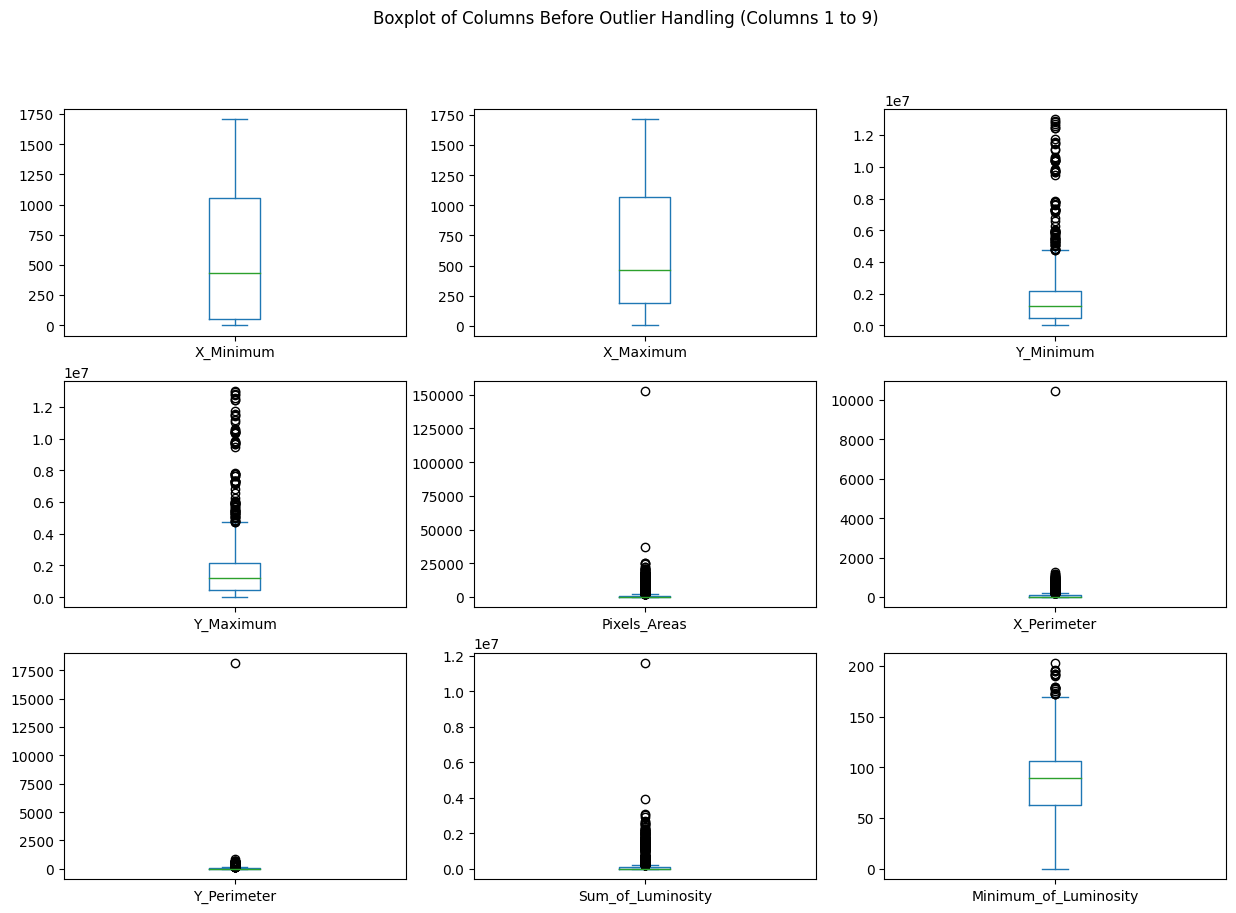

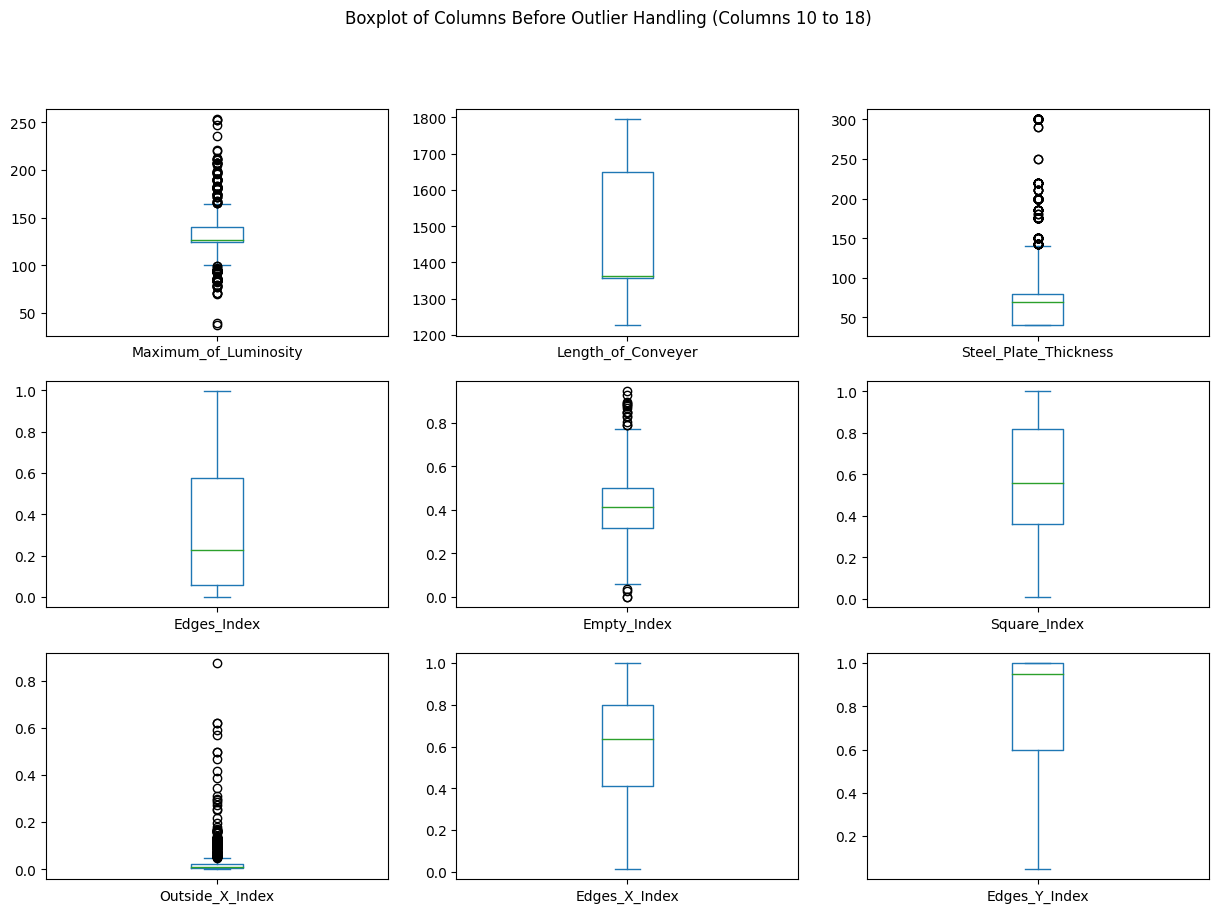

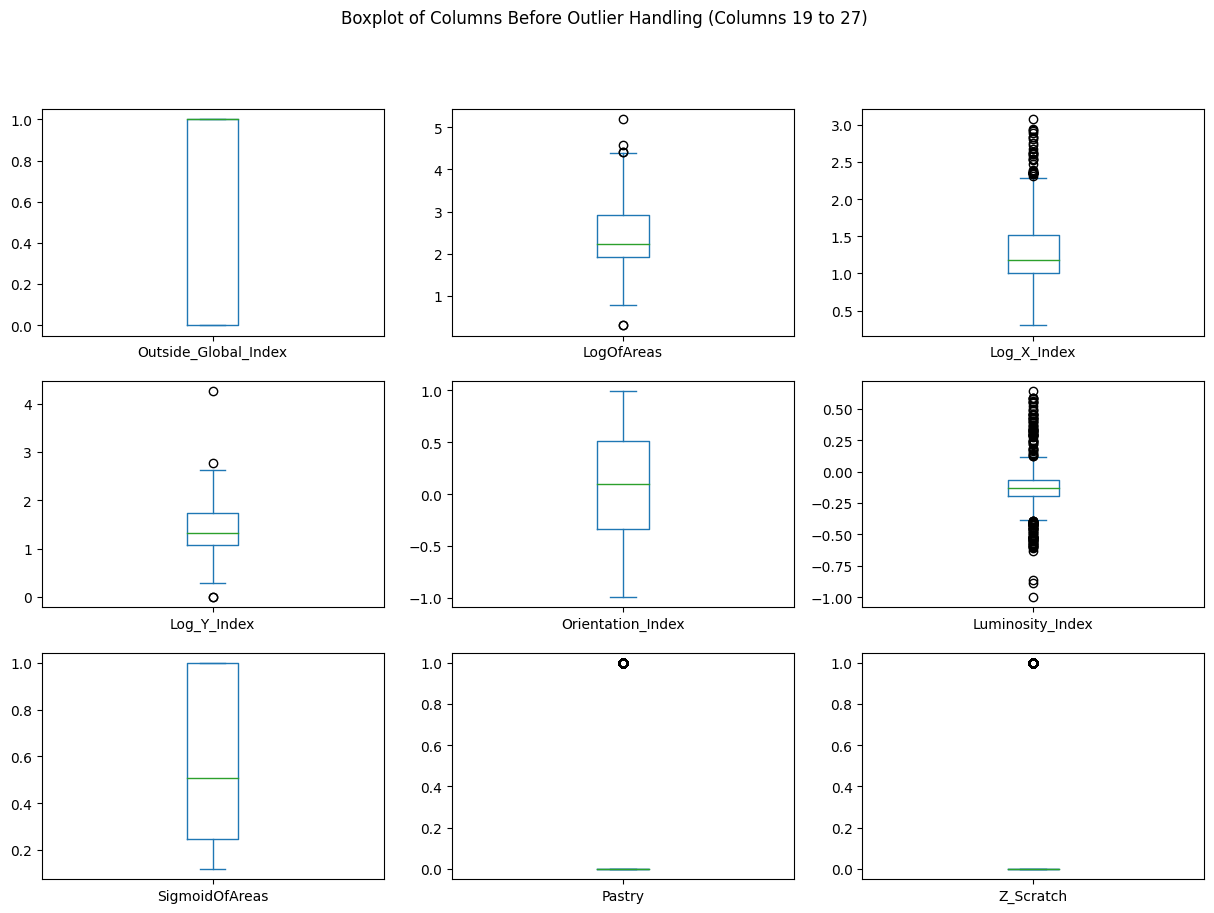

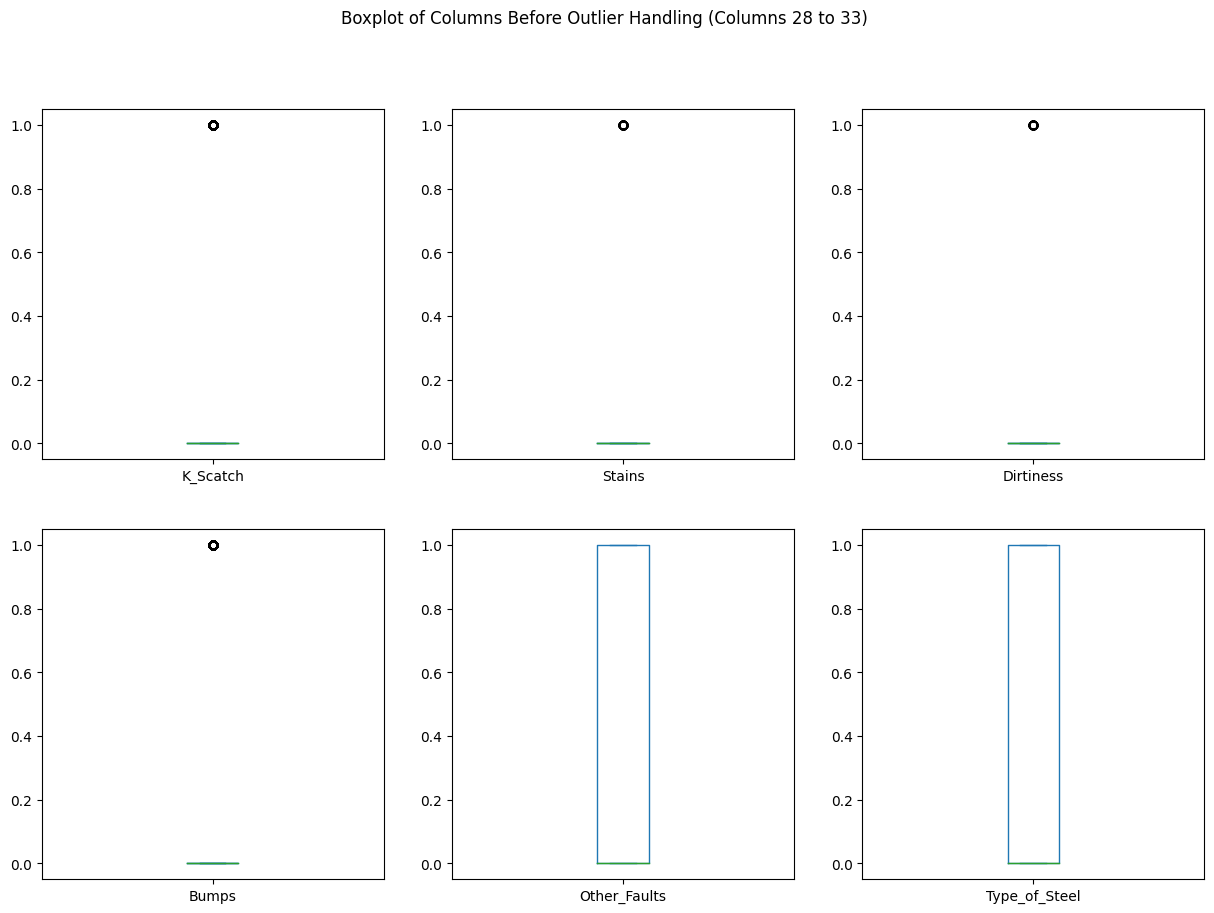

In [ ]:
# Show 'before' outlier handling boxplot
numeric_df = handle_outliers(numeric_df, threshold=3, method='median')

##### Visualisasi outlier setelah ditangani dalam bentuk grafik Boxplot

In [ ]:
# Display 'after' outlier handling
numeric_df = handle_outliers(numeric_df, threshold=3, method='median', show='after')

In [ ]:
def combine_columns(df, col_A, first_value, col_B, second_value, new_col='Type'):
    """
    Function to combine two binary columns into a new column with string values based on their conditions.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    col_A (str): The name of the first column.
    col_B (str): The name of the second column.
    new_col (str): The name of the new column to create. Default is 'Type'.

    Returns:
    pd.DataFrame: The DataFrame with the new 'Type' column.
    """
    # Ensure both columns exist in the DataFrame
    if col_A not in df.columns or col_B not in df.columns:
        raise ValueError(f"Columns '{col_A}' or '{col_B}' do not exist in the DataFrame.")

    # Create the new 'Type' column based on conditions
    df[new_col] = df.apply(lambda row: first_value if row[col_A] == 1 and row[col_B] == 0 else
                                       second_value if row[col_A] == 0 and row[col_B] == 1 else 'None', axis=1)

    return df

# Example usage:
df = combine_columns(df, 'TypeOfSteel_A300', 'A300', 'TypeOfSteel_A400', 'A400', 'Type_of_Steel')

In [ ]:
df['Type_of_Steel'].value_counts()

,count
Type_of_Steel,
A400,1164
A300,777


In [ ]:
def handle_outliers(df, column):
    """
    Handle outliers in a specified column of the dataframe using the IQR method.
    Outliers will be replaced with the mean of the column.
    """
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1

    # Define the lower and upper bound for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Calculate the mean of the column (to replace outliers)
    mean_value = df[column].mean()

    # Replace outliers with the mean value
    df[column] = df[column].apply(lambda x: mean_value if x < lower_bound or x > upper_bound else x)

    return df


# Example usage:
# df = handle_outliers(df, 'Pixels_Areas')
# df = handle_outliers(df, 'Sum_of_Luminosity')
df = handle_outliers(df, 'Steel_Plate_Thickness')

##### Check outlier in sum_of_luminosity column

Number of outliers in 'Steel_Plate_Thickness': 1


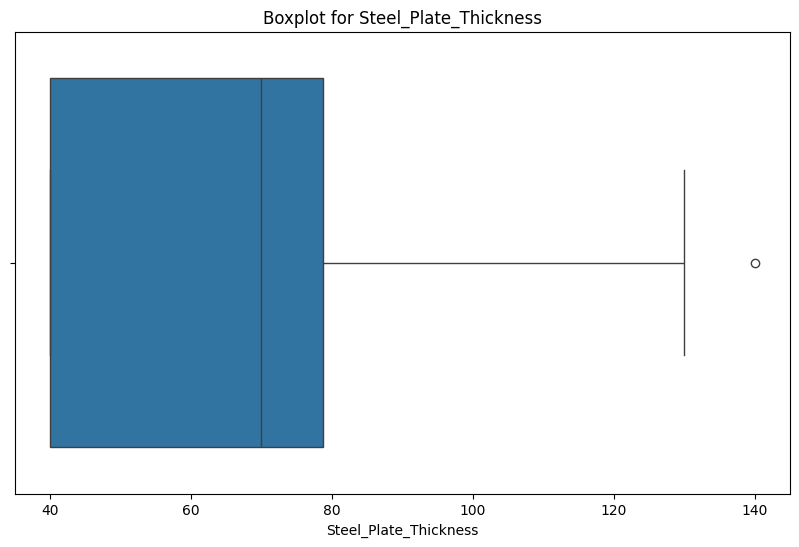

In [ ]:
def show_outliers(df, column):
    """
    Function to show outliers in a specified column of a DataFrame.
    """
    # Ensure the column exists in the DataFrame
    if column not in df.columns:
        raise ValueError(f"Column '{column}' does not exist in the DataFrame.")

    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    # Calculate IQR
    IQR = Q3 - Q1

    # Define outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    # Print the number of outliers
    print(f"Number of outliers in '{column}': {outliers.shape[0]}")

    # Plotting
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot for {column}')
    plt.show()

# Example usage
# show_outliers(df, 'Pixels_Areas')
# show_outliers(df, 'Sum_of_Luminosity')
show_outliers(df, 'Steel_Plate_Thickness')

In [ ]:
len(df)

1941

In [ ]:
df.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Type_of_Steel,label
0,42,50,270900,270944,267.00,17,44,24220.00,76,108,1687,1,0,80.00,0.05,0.24,0.18,0.00,0.47,1.00,1.00,2.43,0.90,1.64,0.82,-0.29,0.58,0,Pastry
1,645,651,2538079,2538108,108.00,10,30,11397.00,84,123,1687,1,0,80.00,0.76,0.38,0.21,0.00,0.60,0.97,1.00,2.03,0.78,1.46,0.79,-0.18,0.30,0,Pastry
2,829,835,1553913,1553931,71.00,8,19,7972.00,99,125,1623,1,0,100.00,0.97,0.34,0.33,0.00,0.75,0.95,1.00,1.85,0.78,1.26,0.67,-0.12,0.21,0,Pastry
3,853,860,369370,369415,176.00,13,45,18996.00,99,126,1353,0,1,78.74,0.73,0.44,0.16,0.01,0.54,1.00,1.00,2.25,0.85,1.65,0.84,-0.16,0.52,1,Pastry
4,1289,1306,498078,498335,1893.88,60,260,206312.15,37,126,1353,0,1,78.74,0.07,0.45,0.07,0.01,0.28,0.99,1.00,3.38,1.23,2.41,0.93,-0.20,1.00,1,Pastry


In [ ]:
#### Create label column based on label values as column
def combine_labels_to_unique_integer(df, label_columns, column_name):
    """
    Combine multiple label columns into one column with unique integer values, and return a mapping
    of the unique integers to their corresponding label name (only where the value is 1).

    Parameters:
    - df: The DataFrame containing the label columns.
    - label_columns: A list of column names representing the label columns.

    Returns:
    - A new DataFrame with a single column 'label' containing the unique integer values.
    - A dictionary mapping unique integers to their corresponding label name with value 1.
    """
    # Combine the label columns into one by converting each unique combination to an integer
    label_tuples = df[label_columns].apply(tuple, axis=1)
    df[column_name] = label_tuples.astype('category').cat.codes

    # Create a mapping of unique integer codes to the original label where the value is 1
    unique_combinations = label_tuples.astype('category').cat.categories
    label_mapping = {i: label_columns[combo.index(1)]
                     for i, combo in enumerate(unique_combinations) if 1 in combo}

    # Drop the original label columns
    df = df.drop(columns=label_columns)

    return df, label_mapping

In [ ]:
# Menggabungkan kolom-kolom label menjadi sebuah kolom 'label'
label_columns = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']
df[label_columns] = df[label_columns].replace({'No': 0, 'Yes': 1})
df, label_info = combine_labels_to_unique_integer(df, label_columns, 'label')
label_info

{0: 'Other_Faults',
 1: 'Bumps',
 2: 'Dirtiness',
 3: 'Stains',
 4: 'K_Scatch',
 5: 'Z_Scratch',
 6: 'Pastry'}

In [ ]:
# Menggabungkan kolom-kolom label menjadi sebuah kolom 'label'
type_of_steel_column = ['Type_of_Steel']
df[type_of_steel_column] = df[type_of_steel_column].replace({'A400': 1, 'A300': 0})

In [ ]:
type_of_steel_column = ['label']
df[type_of_steel_column] = df[type_of_steel_column].replace(
{'Other Faults': 0,
 'Bumps': 1,
 'Dirtiness': 2,
 'Stains': 3,
 'K Scatch': 4,
 'Z Scratch': 5,
 'Pastry': 6
}
)

In [ ]:
def map_labels(df, column_name, value_mapping):
    """
    Function to map integer values in the 'label' column to string labels based on a given mapping.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the 'label' column with integer values.

    Returns:
    pd.DataFrame: The DataFrame with updated 'label' column values.
    """
    # Define the mapping dictionary

    # Check if 'label' column exists in the DataFrame
    if column_name not in df.columns:
        raise ValueError("The DataFrame does not contain a 'label' column.")

    # Map the integer values to string labels
    df[column_name] = df[column_name].map(value_mapping)

    return df

# Example usage
vm = {
      0: 'Other Faults',
      1: 'Bumps',
      2: 'Dirtiness',
      3: 'Stains',
      4: 'K Scatch',
      5: 'Z Scratch',
      6: 'Pastry'
  }
# vm = {0: 'A400', 1: 'A300'}
df = map_labels(df, 'label', vm)
# df = map_labels(df, 'Type_of_Steel', vm)

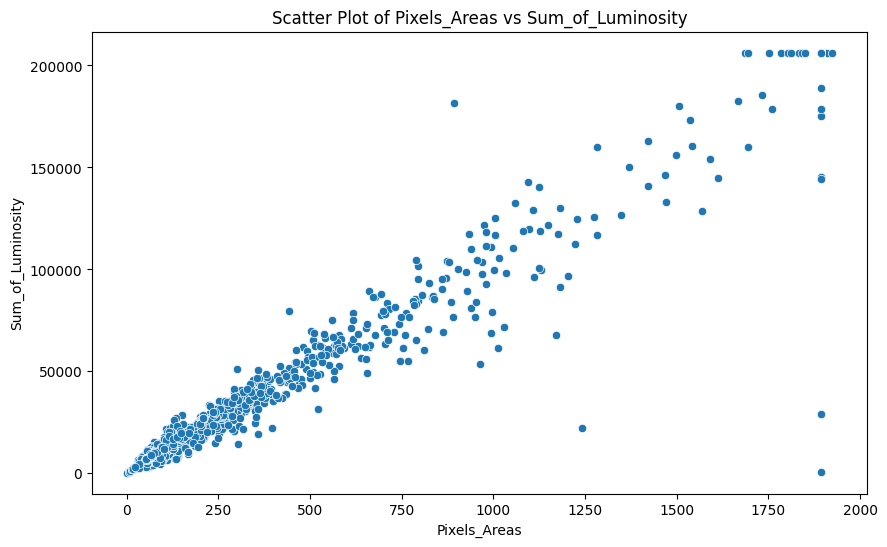

In [ ]:
def scatter_plot(df, x_column, y_column):
    """
    Function to create a scatter plot from two columns in a DataFrame.
    """
    # Ensure both columns exist in the DataFrame
    if x_column not in df.columns or y_column not in df.columns:
        raise ValueError(f"Columns '{x_column}' or '{y_column}' do not exist in the DataFrame.")

    # Create the scatter plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df[x_column], y=df[y_column])

    # Add labels and title
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.title(f'Scatter Plot of {x_column} vs {y_column}')

    # Display the plot
    plt.show()

# Example usage:
scatter_plot(df, 'Pixels_Areas', 'Sum_of_Luminosity')

###Cek Quality Data

In [ ]:
df

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults,Type_of_Steel
0,42,50,270900,270944,267,17,44,24220,76,108,1687,80,0.05,0.24,0.18,0.00,0.47,1.00,1.00,2.43,0.90,1.64,0.82,-0.29,0.58,1,0,0,0,0,0,0,1
1,645,651,2538079,2538108,108,10,30,11397,84,123,1687,80,0.76,0.38,0.21,0.00,0.60,0.97,1.00,2.03,0.78,1.46,0.79,-0.18,0.30,1,0,0,0,0,0,0,1
2,829,835,1553913,1553931,71,8,19,7972,99,125,1623,100,0.97,0.34,0.33,0.00,0.75,0.95,1.00,1.85,0.78,1.26,0.67,-0.12,0.21,1,0,0,0,0,0,0,1
3,853,860,369370,369415,176,13,45,18996,99,126,1353,290,0.73,0.44,0.16,0.01,0.54,1.00,1.00,2.25,0.85,1.65,0.84,-0.16,0.52,1,0,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,1353,185,0.07,0.45,0.07,0.01,0.28,0.99,1.00,3.38,1.23,2.41,0.93,-0.20,1.00,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,249,277,325780,325796,273,54,22,35033,119,141,1360,40,0.37,0.39,0.57,0.02,0.52,0.73,0.00,2.44,1.45,1.20,-0.43,0.00,0.73,0,0,0,0,0,0,1,0
1937,144,175,340581,340598,287,44,24,34599,112,133,1360,40,0.21,0.46,0.55,0.02,0.70,0.71,0.00,2.46,1.49,1.23,-0.45,-0.06,0.82,0,0,0,0,0,0,1,0
1938,145,174,386779,386794,292,40,22,37572,120,140,1360,40,0.21,0.33,0.52,0.02,0.72,0.68,0.00,2.47,1.46,1.18,-0.48,0.01,0.71,0,0,0,0,0,0,1,0
1939,137,170,422497,422528,419,97,47,52715,117,140,1360,40,0.20,0.59,0.94,0.02,0.34,0.66,0.00,2.62,1.52,1.49,-0.06,-0.02,0.99,0,0,0,0,0,0,1,0


###Deskripsi Statistika setelah cleaning dataset

In [ ]:
df.describe()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults,Type_of_Steel
count,1941.00,1941.00,1941.00,1941.00,1941.00,1941.00,1941.00,1941.00,1941.00,1941.00,1941.00,1941.00,1941.00,1941.00,1941.00,1941.00,1941.00,1941.00,1941.00,1941.00,1941.00,1941.00,1941.00,1941.00,1941.00,1941.00,1941.00,1941.00,1941.00,1941.00,1941.00,1941.00,1941.00
mean,571.14,617.96,1650684.87,1650738.71,1893.88,111.86,82.97,206312.15,84.55,130.19,1459.16,78.74,0.33,0.41,0.57,0.03,0.61,0.81,0.58,2.49,1.34,1.40,0.08,-0.13,0.59,0.08,0.10,0.20,0.04,0.03,0.21,0.35,0.40
std,520.69,497.63,1774578.41,1774590.09,5168.46,301.21,426.48,512293.59,32.13,18.69,144.58,55.09,0.30,0.14,0.27,0.06,0.24,0.23,0.48,0.79,0.48,0.45,0.50,0.15,0.34,0.27,0.30,0.40,0.19,0.17,0.41,0.48,0.49
min,0.00,4.00,6712.00,6724.00,2.00,2.00,1.00,250.00,0.00,37.00,1227.00,40.00,0.00,0.00,0.01,0.00,0.01,0.05,0.00,0.30,0.30,0.00,-0.99,-1.00,0.12,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,51.00,192.00,471253.00,471281.00,84.00,15.00,13.00,9522.00,63.00,124.00,1358.00,40.00,0.06,0.32,0.36,0.01,0.41,0.60,0.00,1.92,1.00,1.08,-0.33,-0.20,0.25,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,435.00,467.00,1204128.00,1204136.00,174.00,26.00,25.00,19202.00,90.00,127.00,1364.00,70.00,0.23,0.41,0.56,0.01,0.64,0.95,1.00,2.24,1.18,1.32,0.10,-0.13,0.51,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,1053.00,1072.00,2183073.00,2183084.00,822.00,84.00,83.00,83011.00,106.00,140.00,1650.00,80.00,0.57,0.50,0.82,0.02,0.80,1.00,1.00,2.91,1.52,1.73,0.51,-0.07,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00
max,1705.00,1713.00,12987661.00,12987692.00,152655.00,10449.00,18152.00,11591414.00,203.00,253.00,1794.00,300.00,1.00,0.94,1.00,0.88,1.00,1.00,1.00,5.18,3.07,4.26,0.99,0.64,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


##Exploratory Data Analysis

####Cek distribusi nilai setiap atribut

Setiap atribute memiliki distribusi nilainya masing-masing, oleh karena itu digunakan grafik Violin untuk melihat distribusi nilai dari setiap atribute

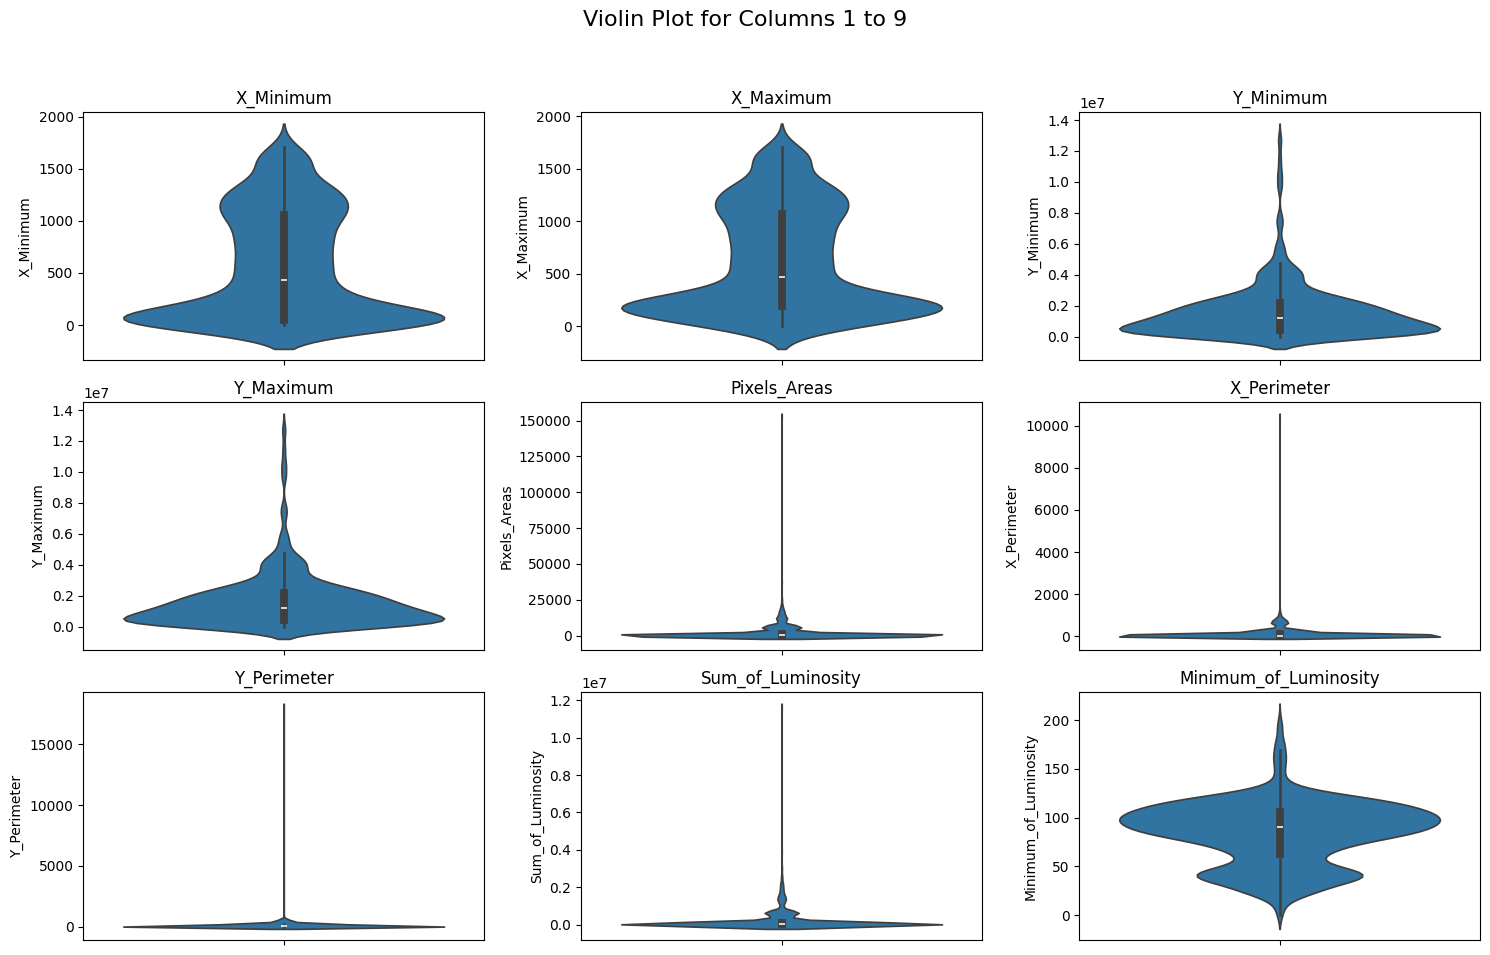

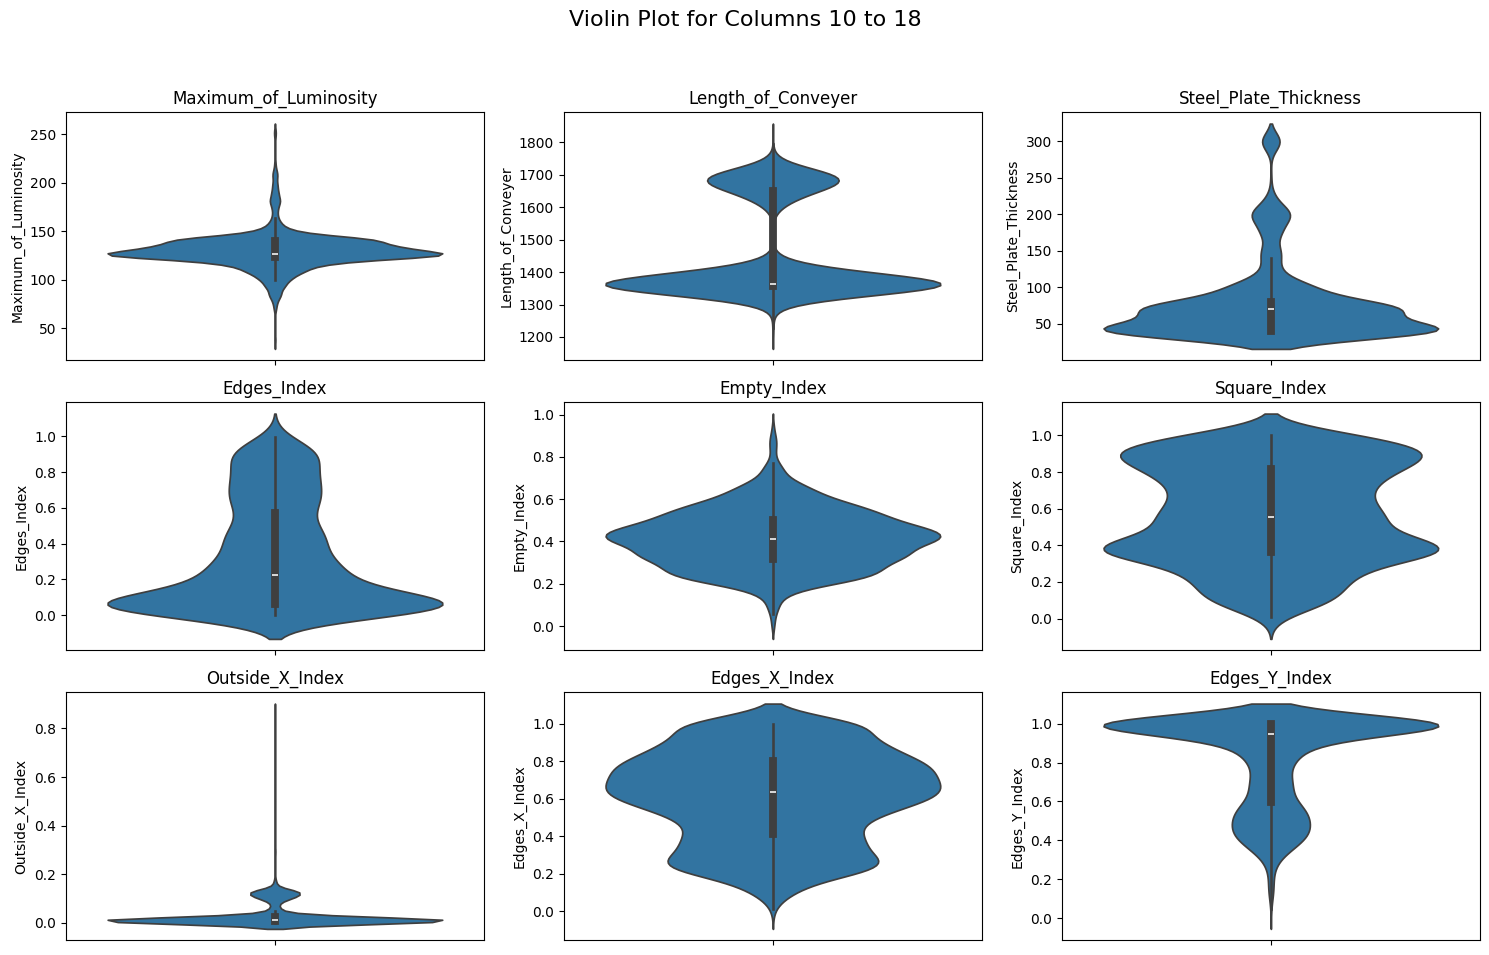

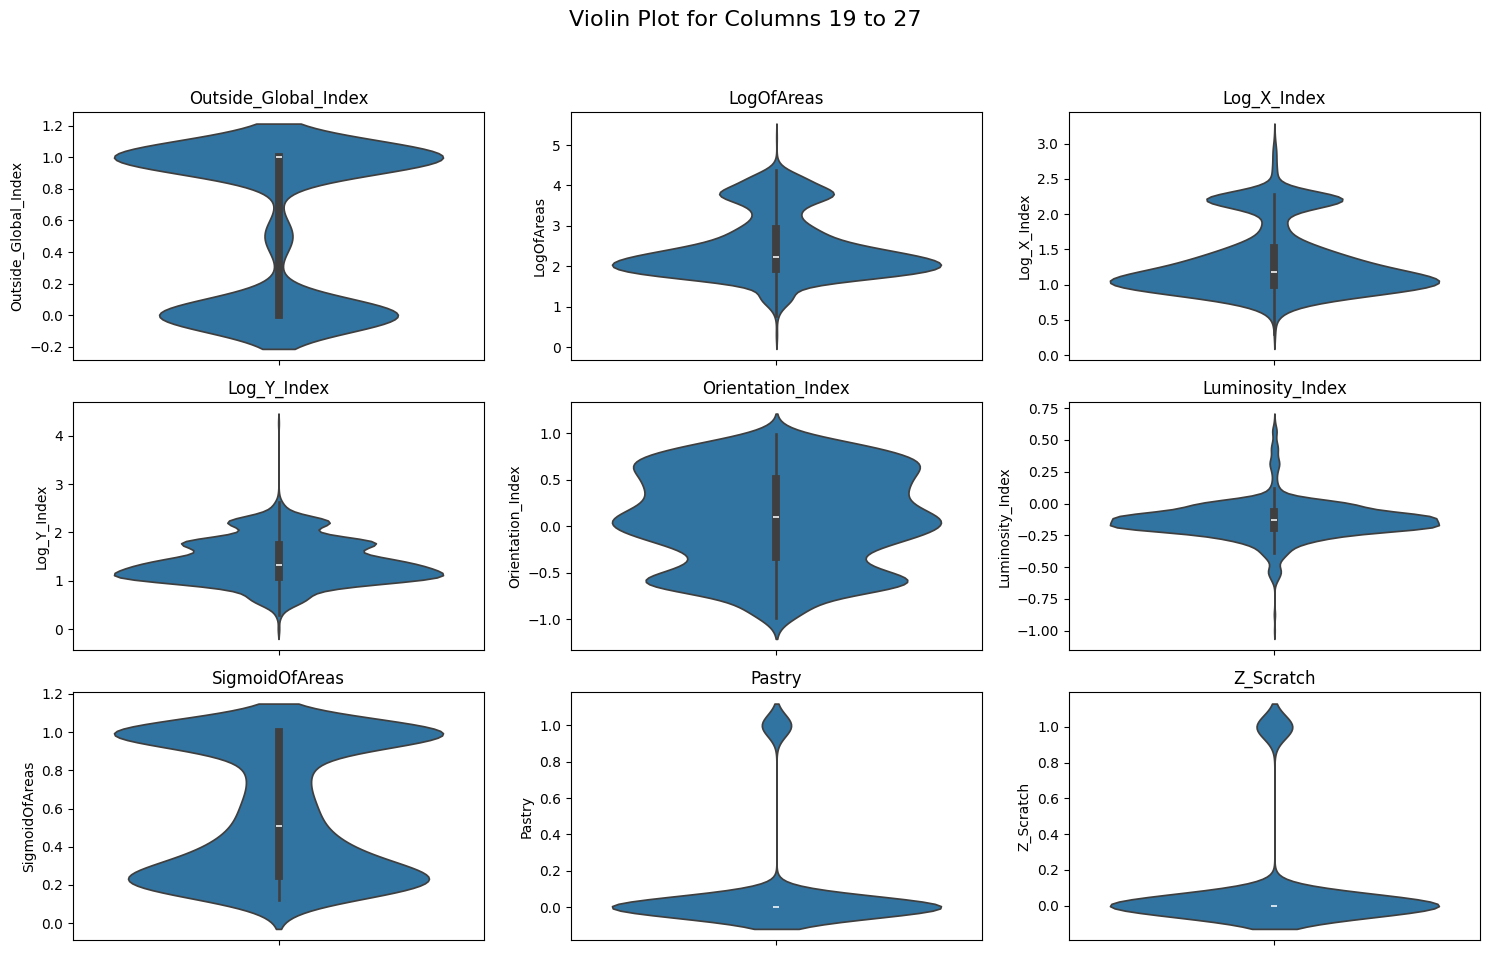

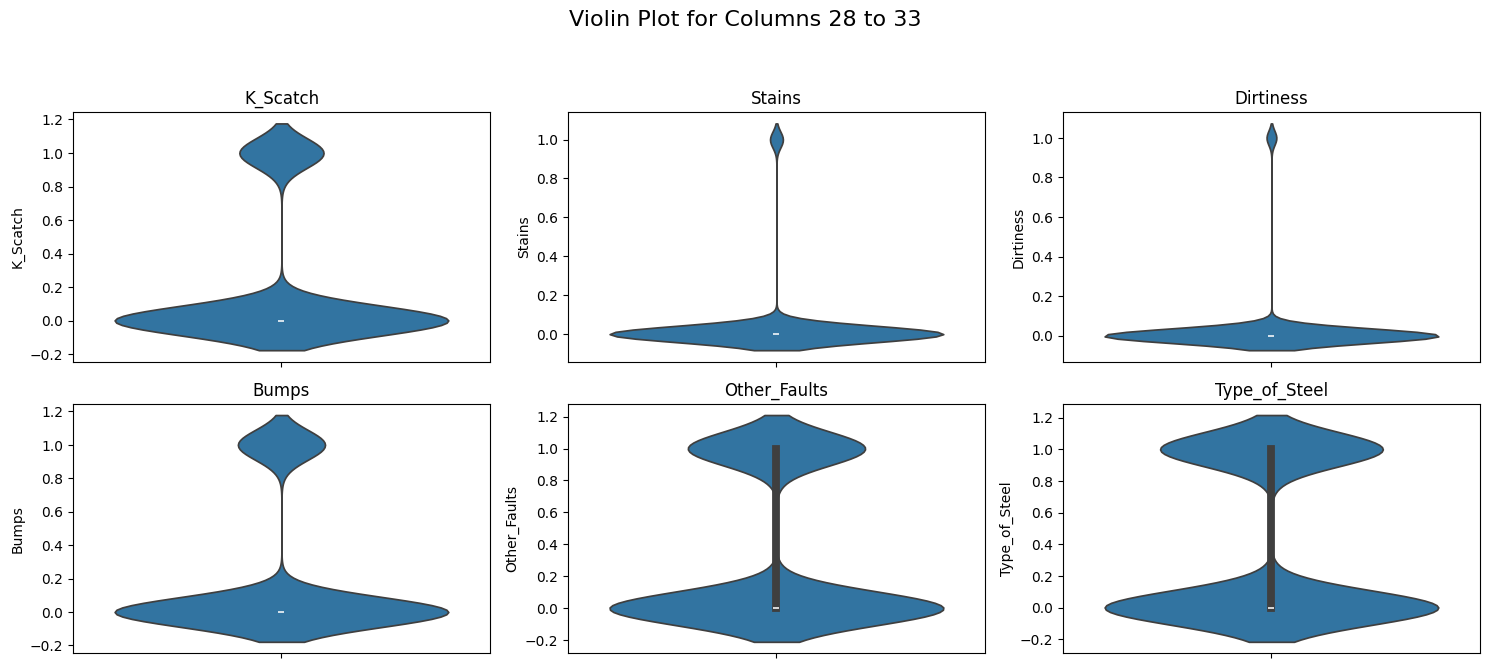

In [ ]:
def plot_violin_plots(df):
    # Filter only numeric columns
    numeric_cols = df.select_dtypes(include=['number']).columns

    # Number of columns to plot
    num_cols = len(numeric_cols)

    # Number of plots per figure (3x3 grid)
    plots_per_fig = 9
    num_figs = math.ceil(num_cols / plots_per_fig)

    # Loop over figures
    for fig_num in range(num_figs):
        # Define column range for the current figure
        start_col = fig_num * plots_per_fig + 1
        end_col = min((fig_num + 1) * plots_per_fig, num_cols)

        # Create a new figure for each 3x3 grid
        fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
        fig.suptitle(f'Violin Plot for Columns {start_col} to {end_col}', fontsize=16)

        # Flatten the axes array for easier iteration
        axes = axes.flatten()

        # Plot each column in the current figure
        for i in range(plots_per_fig):
            col_idx = fig_num * plots_per_fig + i
            if col_idx < num_cols:
                sns.violinplot(data=df, y=numeric_cols[col_idx], ax=axes[i])
                axes[i].set_title(numeric_cols[col_idx])
            else:
                axes[i].set_visible(False)  # Hide unused subplots

        plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout
        plt.show()

# Example usage:
# df = pd.read_csv('your_data.csv')
plot_violin_plots(df)

###Cek Korelasi Data

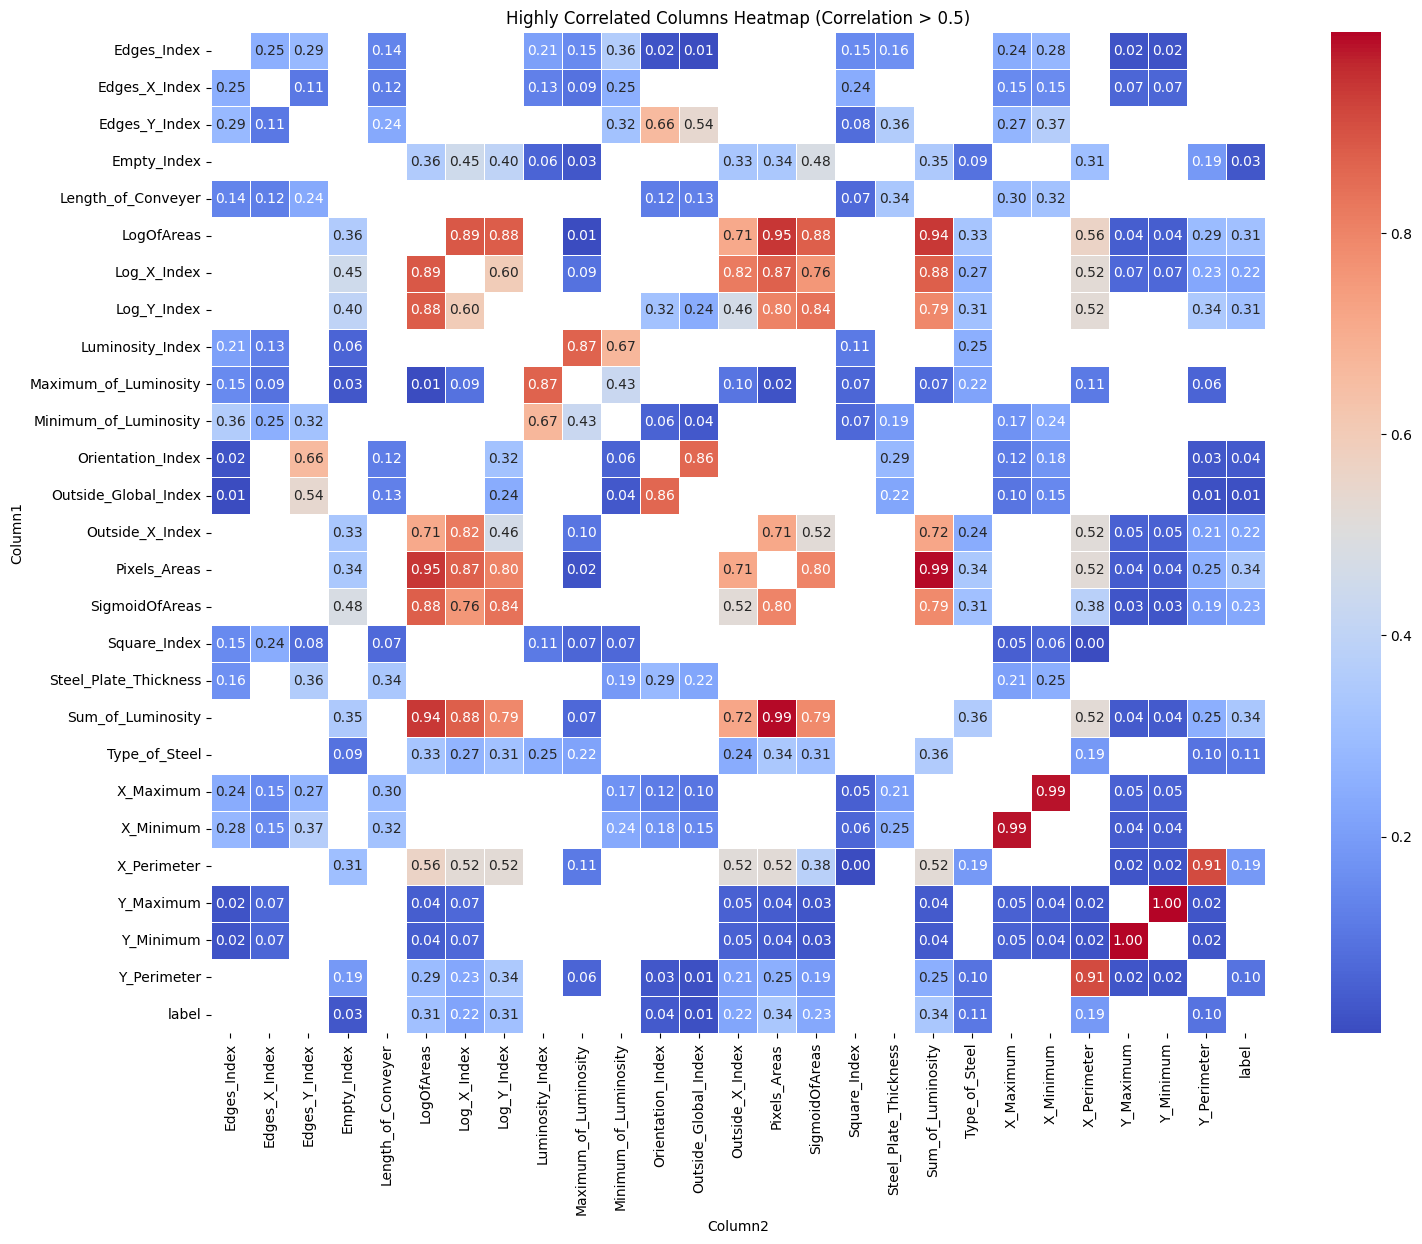

In [ ]:
# Menghasilkan grafik heatmap korelasi yang berisi kolom-kolom dengan nilai korelasi lebih dari 0.5

def show_only_high_corr_value(df, threshold):
  # Compute the correlation matrix
  corr_matrix = df.corr()

  # Filter columns based on correlation threshold (e.g., 0.5)
  high_corr_pairs = corr_matrix[corr_matrix > threshold].stack().reset_index().query('level_0 != level_1')
  high_corr_pairs.columns = ['Column1', 'Column2', 'Correlation']
  high_corr_pairs = high_corr_pairs[high_corr_pairs['Correlation'] > threshold]

  # Create a pivot table for the heatmap
  heatmap_data = high_corr_pairs.pivot_table(index='Column1', columns='Column2', values='Correlation')

  # Set up the matplotlib figure
  plt.figure(figsize=(17, 13))

  # Create the heatmap
  sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

  # Add a title
  plt.title('Highly Correlated Columns Heatmap (Correlation > 0.5)')

  # Show the plot
  plt.show()

show_only_high_corr_value(df, 0)

####Korelasi Variabel Independen dengan Dependen

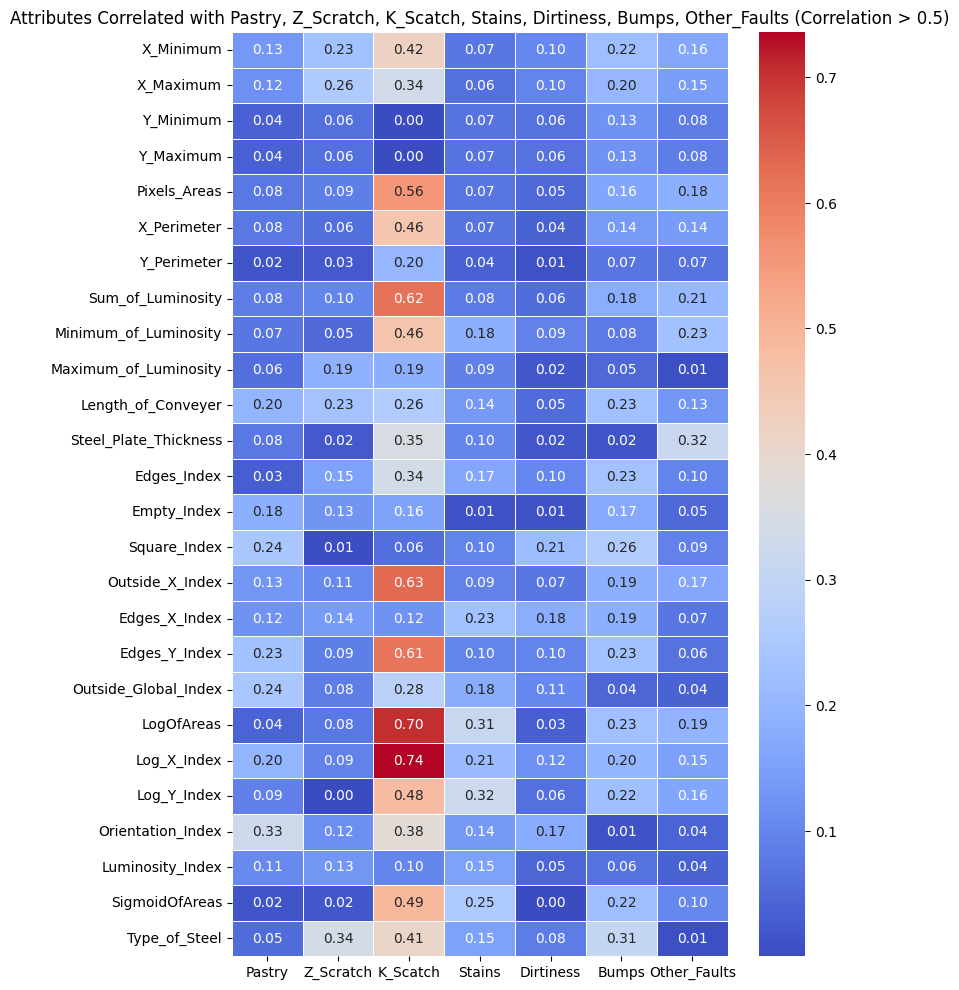

In [ ]:
def show_corr_with_label(df, label_columns=['label'], threshold=0.5):
    """
    Show the correlation between all independent attributes and the specified label columns.

    Parameters:
    - df: DataFrame containing the data.
    - label_columns: List of column names of the dependent variables (default is ['label']).
    - threshold: Correlation threshold (default is 0.5).

    Returns:
    - DataFrame with columns that have a correlation higher than the threshold with the dependent variables.
    """
    # Compute the correlation matrix for all columns
    corr_matrix = df.corr()

    # Extract correlations with the dependent columns (label_columns)
    corr_with_labels = corr_matrix[label_columns].drop(index=label_columns, errors='ignore')

    # Take absolute values of the correlations
    abs_corr_with_labels = corr_with_labels.abs()

    # Filter based on the correlation threshold, but include all independent columns
    filtered_corr_with_labels = abs_corr_with_labels[abs_corr_with_labels.max(axis=1) > threshold]

    # If there are fewer than the rest of columns, include all independent columns
    if filtered_corr_with_labels.shape[0] < (df.shape[1] - len(label_columns)):
        filtered_corr_with_labels = abs_corr_with_labels

    # Create a heatmap for the correlations with absolute values
    plt.figure(figsize=(8, 12))
    sns.heatmap(filtered_corr_with_labels, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, yticklabels=1)

    # Make the y-axis labels horizontal
    plt.yticks(rotation=0)

    # Add a title
    plt.title(f'Attributes Correlated with {", ".join(label_columns)} (Correlation > {threshold})')

    # Show the plot
    plt.show()

# Usage Example:
show_corr_with_label(df, label_columns=['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults'], threshold=0.5)

Dari hasil korelasi antara variabel independen dan dependen di atas diketahui bahwa label K_Scratch merupakan label yang paling mudah untuk diamati, karena label K_Scratch memiliki korelasi yang cukup banyak terhadap variabel-variabel independennya.

Lalu untuk label lain (seperti Dirtiness dan Pastry) yang rata-rata memiliki koralasi rendah terhadap variabel-variabel independen lainnya, membutuhkan analisis yang lebih mendalam untuk mengetahui hubungan-hubungan lainnya yang mungkin ada terhadap kombinasi variabel-variabel independen dan dependen

##Visualization

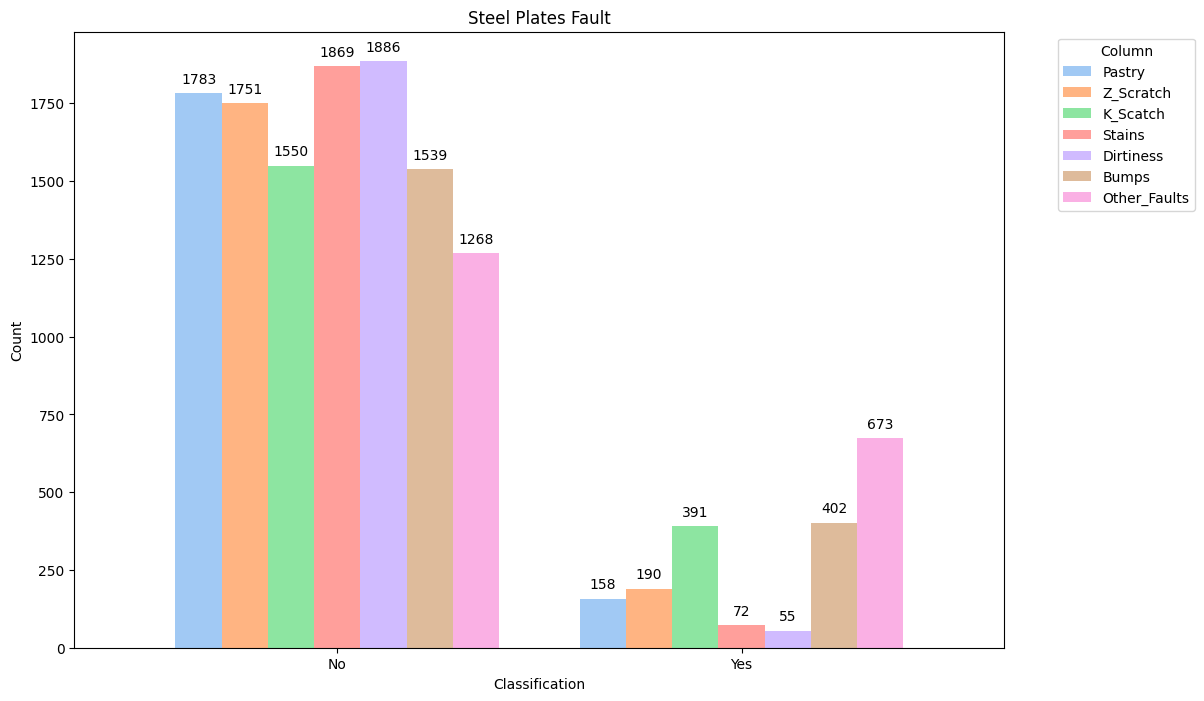

In [ ]:
def plot_fault_distribution(df, columns_to_visualize):
    """
    Function to plot the distribution of faults in the steel plates dataset.
    It replaces 0 with 'No' and 1 with 'Yes' in the given columns and shows a bar chart.
    """
    # Replace 0 with 'No' and 1 with 'Yes' in the DataFrame
    df[columns_to_visualize] = df[columns_to_visualize].replace({0: 'No', 1: 'Yes'})

    # Count occurrences for each column and store them in a DataFrame
    value_counts_df = pd.DataFrame({col: df[col].value_counts() for col in columns_to_visualize}).fillna(0)

    # Create a bar chart for all variables with muted colors
    ax = value_counts_df.plot(kind='bar', figsize=(12, 8), width=0.8, color=sns.color_palette('pastel', len(columns_to_visualize)))
    plt.title('Steel Plates Fault')
    plt.xlabel('Classification')
    plt.ylabel('Count')
    plt.legend(title='Column', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Rotate x-axis labels by 0 degrees
    plt.xticks(rotation=0)

    # Add value labels on top of each bar
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 10),
                    textcoords='offset points')

    # Show the plot
    plt.show()

# Example usage:
plot_fault_distribution(df, ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults'])

In [ ]:
# Menggabungkan kolom-kolom label menjadi sebuah kolom 'label'
df_with_label = df.copy()
label_columns = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']
df_with_label[label_columns] = df_with_label[label_columns].replace({'No': 0, 'Yes': 1})
df_with_label, label_info = combine_labels_to_unique_integer(df_with_label, label_columns, 'label')
label_info

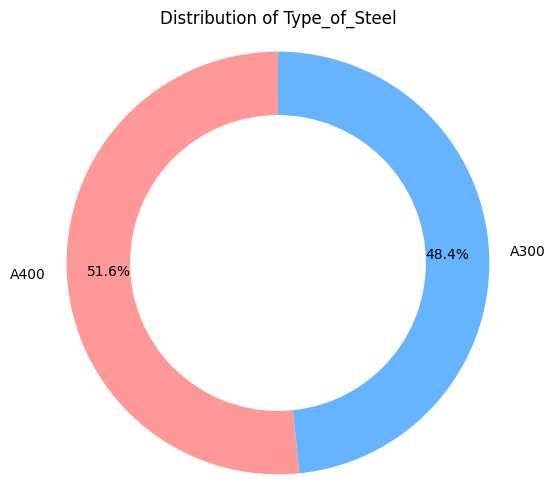

In [ ]:
def plot_doughnut_chart_type_of_steel(df, column_name):
    # Count the occurrences of each unique value in the column
    value_counts = df[column_name].value_counts()

    # Get the unique values and their counts
    labels = ['A400', 'A300']
    sizes = value_counts.values
    total = sizes.sum()

    # Calculate percentages
    percentages = [size / total * 100 for size in sizes]

    # Color palette
    colors = ['#ff9999', '#66b3ff']

    # Create the doughnut chart
    plt.figure(figsize=(6, 6))
    wedges, texts = plt.pie(sizes, labels=labels, colors=colors, startangle=90, wedgeprops=dict(width=1))

    # Add a circle at the center to create a doughnut shape
    center_circle = plt.Circle((0, 0), 0.70, fc='white')
    plt.gca().add_artist(center_circle)

    # Adjust the percentage text position manually
    for i, wedge in enumerate(wedges):
        angle = (wedge.theta2 + wedge.theta1) / 2  # Calculate the angle for the wedge
        # Convert angle to radians for trigonometric functions
        angle_rad = np.deg2rad(angle)
        # Compute the position of the text
        x = 0.8 * np.cos(angle_rad)
        y = 0.8 * np.sin(angle_rad)
        # Format the percentage value
        percentage_text = f'{percentages[i]:.1f}%'
        # Add the text to the plot
        plt.text(x, y, percentage_text, ha='center', va='center', fontsize=10, color='black')

    # Add legend
    # legend_labels = {0: 'Other_Faults', 1: 'Bumps', 2: 'Dirtiness', 3: 'Stains', 4: 'K_Scatch', 5: 'Z_Scratch', 6: 'Pastry'}
    # plt.legend(handles=wedges, labels=[legend_labels[int(label)] for label in labels], loc='best')

    # Equal aspect ratio ensures that the pie chart is drawn as a circle.
    plt.axis('equal')

    # Title and display
    plt.title(f'Distribution of {column_name}')
    plt.show()

plot_doughnut_chart_type_of_steel(df, 'Type_of_Steel')

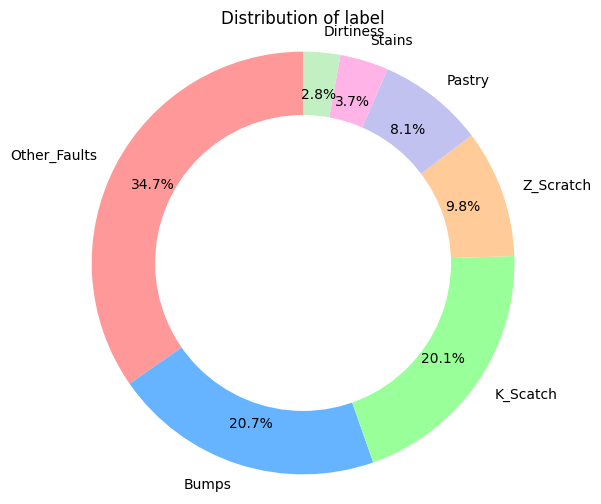

In [ ]:
def plot_doughnut_chart(df, column_name):
    # Count the occurrences of each unique value in the column
    value_counts = df[column_name].value_counts()

    # Get the unique values and their counts
    labels = ['Other_Faults', 'Bumps', 'K_Scatch', 'Z_Scratch', 'Pastry', 'Stains', 'Dirtiness']
    sizes = value_counts.values
    total = sizes.sum()

    # Calculate percentages
    percentages = [size / total * 100 for size in sizes]

    # Color palette
    colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#c2f0c2']

    # Create the doughnut chart
    plt.figure(figsize=(6, 6))
    wedges, texts = plt.pie(sizes, labels=labels, colors=colors, startangle=90, wedgeprops=dict(width=1))

    # Add a circle at the center to create a doughnut shape
    center_circle = plt.Circle((0, 0), 0.70, fc='white')
    plt.gca().add_artist(center_circle)

    # Adjust the percentage text position manually
    for i, wedge in enumerate(wedges):
        angle = (wedge.theta2 + wedge.theta1) / 2  # Calculate the angle for the wedge
        # Convert angle to radians for trigonometric functions
        angle_rad = np.deg2rad(angle)
        # Compute the position of the text
        x = 0.8 * np.cos(angle_rad)
        y = 0.8 * np.sin(angle_rad)
        # Format the percentage value
        percentage_text = f'{percentages[i]:.1f}%'
        # Add the text to the plot
        plt.text(x, y, percentage_text, ha='center', va='center', fontsize=10, color='black')

    # Add legend
    # legend_labels = {0: 'Other_Faults', 1: 'Bumps', 2: 'Dirtiness', 3: 'Stains', 4: 'K_Scatch', 5: 'Z_Scratch', 6: 'Pastry'}
    # plt.legend(handles=wedges, labels=[legend_labels[int(label)] for label in labels], loc='best')

    # Equal aspect ratio ensures that the pie chart is drawn as a circle.
    plt.axis('equal')

    # Title and display
    plt.title(f'Distribution of {column_name}')
    plt.show()

plot_doughnut_chart(df, 'label')

###Univariate Analysis

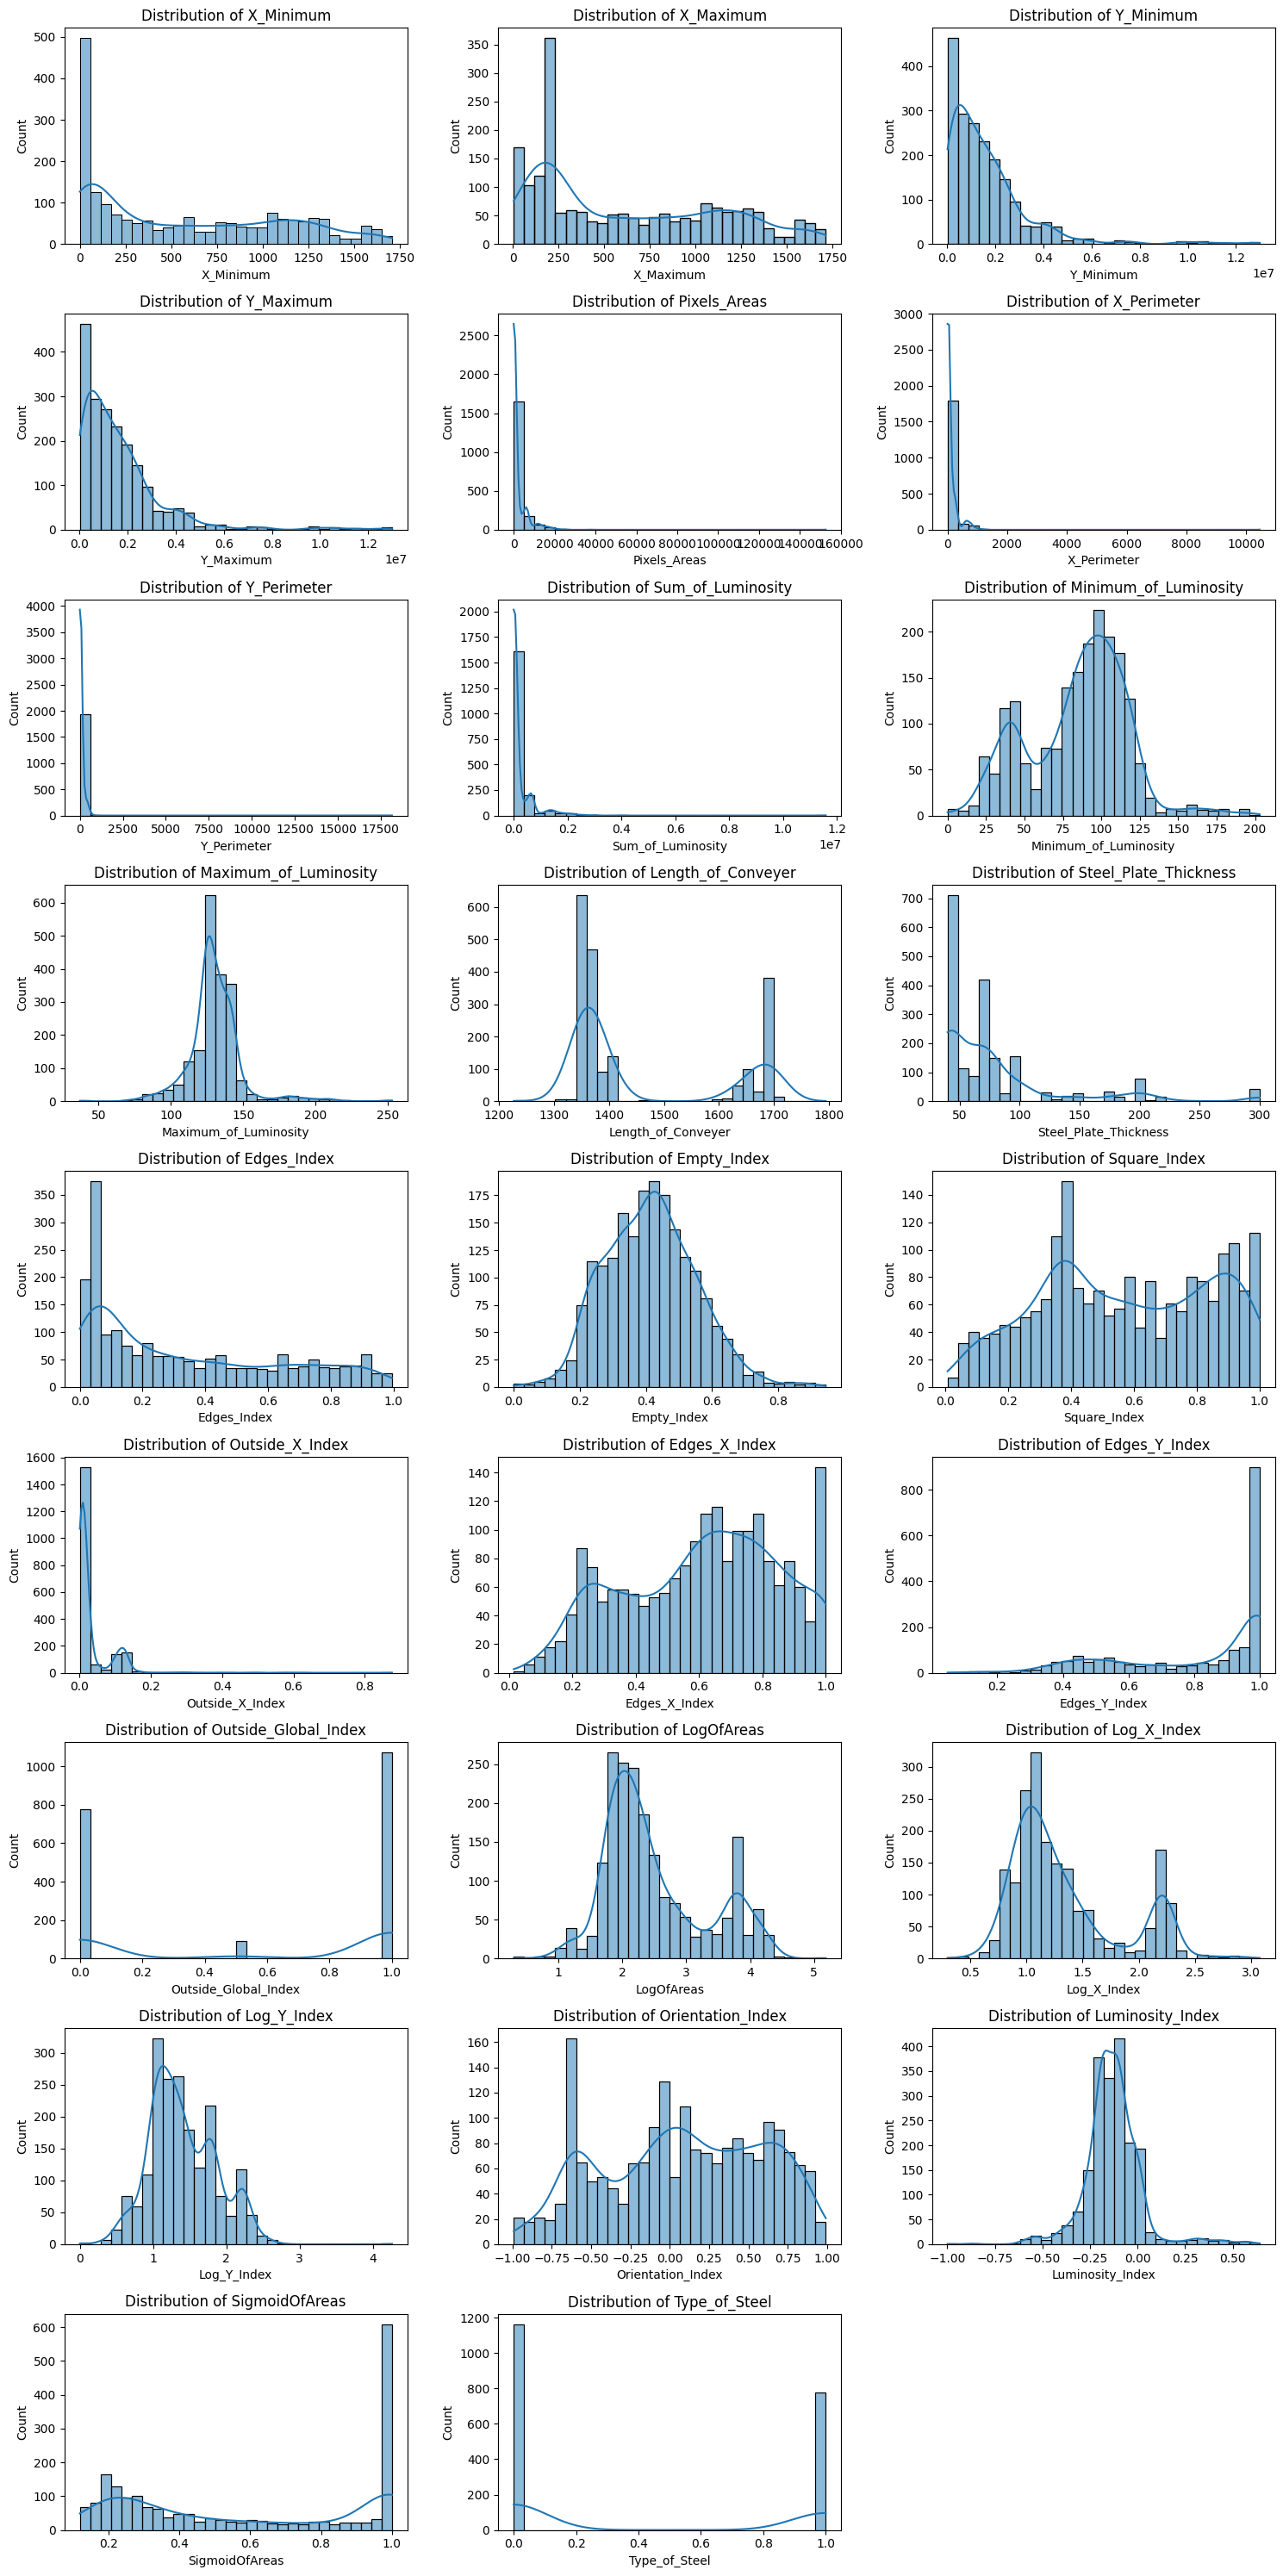

In [ ]:
def plot_histograms(df, label_columns):
    """
    Function to display histograms for all columns in the DataFrame except the specified label columns.
    """
    # Define all columns and filter out the label columns
    df_columns = df.columns
    filtered_columns = [col for col in df_columns if col not in label_columns]

    # Set up the figure size
    plt.figure(figsize=(15, 30))

    # Loop through the filtered columns and create histograms
    for i, column in enumerate(filtered_columns, 1):
        plt.subplot(len(filtered_columns) // 3 + 1, 3, i)
        sns.histplot(df[column], bins=30, kde=True)
        plt.title(f'Distribution of {column}', fontsize=12)
        plt.tight_layout()

    # Show the plot
    plt.show()

# Example usage:
plot_histograms(df, ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults'])

In [ ]:
def plot_type_distribution(df, column_name):
    """
    This function creates a bar chart showing the count of 0 and 1 in a specified column.
    """
    if column_name not in df.columns:
        raise ValueError(f"Column '{column_name}' not found in the DataFrame.")

    # Count the occurrences of each unique value (0 and 1)
    value_counts = df[column_name].value_counts()

    # Plot the bar chart
    plt.figure(figsize=(6, 4))
    value_counts.plot(kind='bar', color=['skyblue', 'lightgreen'])

    # Set plot labels and title
    plt.title(f"Distribution of '{column_name}' Values")
    plt.xlabel(f"{column_name} Values")
    plt.ylabel("Count")

    # Set custom x-axis tick labels ('No' for 0 and 'Yes' for 1)
    plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation=0)

    # Display the count values on top of each bar
    for index, value in enumerate(value_counts):
        plt.text(index, value, str(value), ha='center', va='bottom')

    # Show the plot
    plt.show()

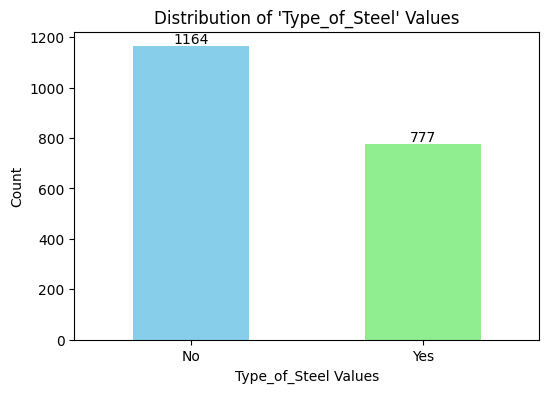

In [ ]:
# Example usage:
plot_type_distribution(df, 'Type_of_Steel')

In [ ]:
def plot_bar_relationship(df, independent_var, dependent_var):
    """
    Bar plot showing the mean value of the independent variable for each value of the dependent variable.
    """
    # Group by dependent variable and calculate mean of independent variable
    grouped_data = df.groupby(dependent_var)[independent_var].mean().reset_index()

    # Bar plotcolors = ['#ff9999','#66b3ff']
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(data=grouped_data, x=dependent_var, y=independent_var, hue=dependent_var, palette=['#ff9999', '#66b3ff'], legend=False)
    # ax = sns.barplot(data=df, x=dependent_var, y=independent_var, hue=dependent_var, palette={0: 'red', 1: 'blue'}, legend=False)
    ax.bar_label(ax.containers[0], fmt='%.2f')
    ax.bar_label(ax.containers[1], fmt='%.2f')
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['No', 'Yes'])

    # Titles and labels
    plt.title(f'Bar plot: Mean of {independent_var} by {dependent_var}')
    plt.xlabel(dependent_var)
    plt.ylabel(f'Mean of {independent_var}')

    plt.show()

In [ ]:
df

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults,Type_of_Steel
0,42,50,270900,270944,267,17,44,24220,76,108,1687,80,0.05,0.24,0.18,0.00,0.47,1.00,1.00,2.43,0.90,1.64,0.82,-0.29,0.58,Yes,No,No,No,No,No,No,1
1,645,651,2538079,2538108,108,10,30,11397,84,123,1687,80,0.76,0.38,0.21,0.00,0.60,0.97,1.00,2.03,0.78,1.46,0.79,-0.18,0.30,Yes,No,No,No,No,No,No,1
2,829,835,1553913,1553931,71,8,19,7972,99,125,1623,100,0.97,0.34,0.33,0.00,0.75,0.95,1.00,1.85,0.78,1.26,0.67,-0.12,0.21,Yes,No,No,No,No,No,No,1
3,853,860,369370,369415,176,13,45,18996,99,126,1353,290,0.73,0.44,0.16,0.01,0.54,1.00,1.00,2.25,0.85,1.65,0.84,-0.16,0.52,Yes,No,No,No,No,No,No,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,1353,185,0.07,0.45,0.07,0.01,0.28,0.99,1.00,3.38,1.23,2.41,0.93,-0.20,1.00,Yes,No,No,No,No,No,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,249,277,325780,325796,273,54,22,35033,119,141,1360,40,0.37,0.39,0.57,0.02,0.52,0.73,0.00,2.44,1.45,1.20,-0.43,0.00,0.73,No,No,No,No,No,No,Yes,0
1937,144,175,340581,340598,287,44,24,34599,112,133,1360,40,0.21,0.46,0.55,0.02,0.70,0.71,0.00,2.46,1.49,1.23,-0.45,-0.06,0.82,No,No,No,No,No,No,Yes,0
1938,145,174,386779,386794,292,40,22,37572,120,140,1360,40,0.21,0.33,0.52,0.02,0.72,0.68,0.00,2.47,1.46,1.18,-0.48,0.01,0.71,No,No,No,No,No,No,Yes,0
1939,137,170,422497,422528,419,97,47,52715,117,140,1360,40,0.20,0.59,0.94,0.02,0.34,0.66,0.00,2.62,1.52,1.49,-0.06,-0.02,0.99,No,No,No,No,No,No,Yes,0


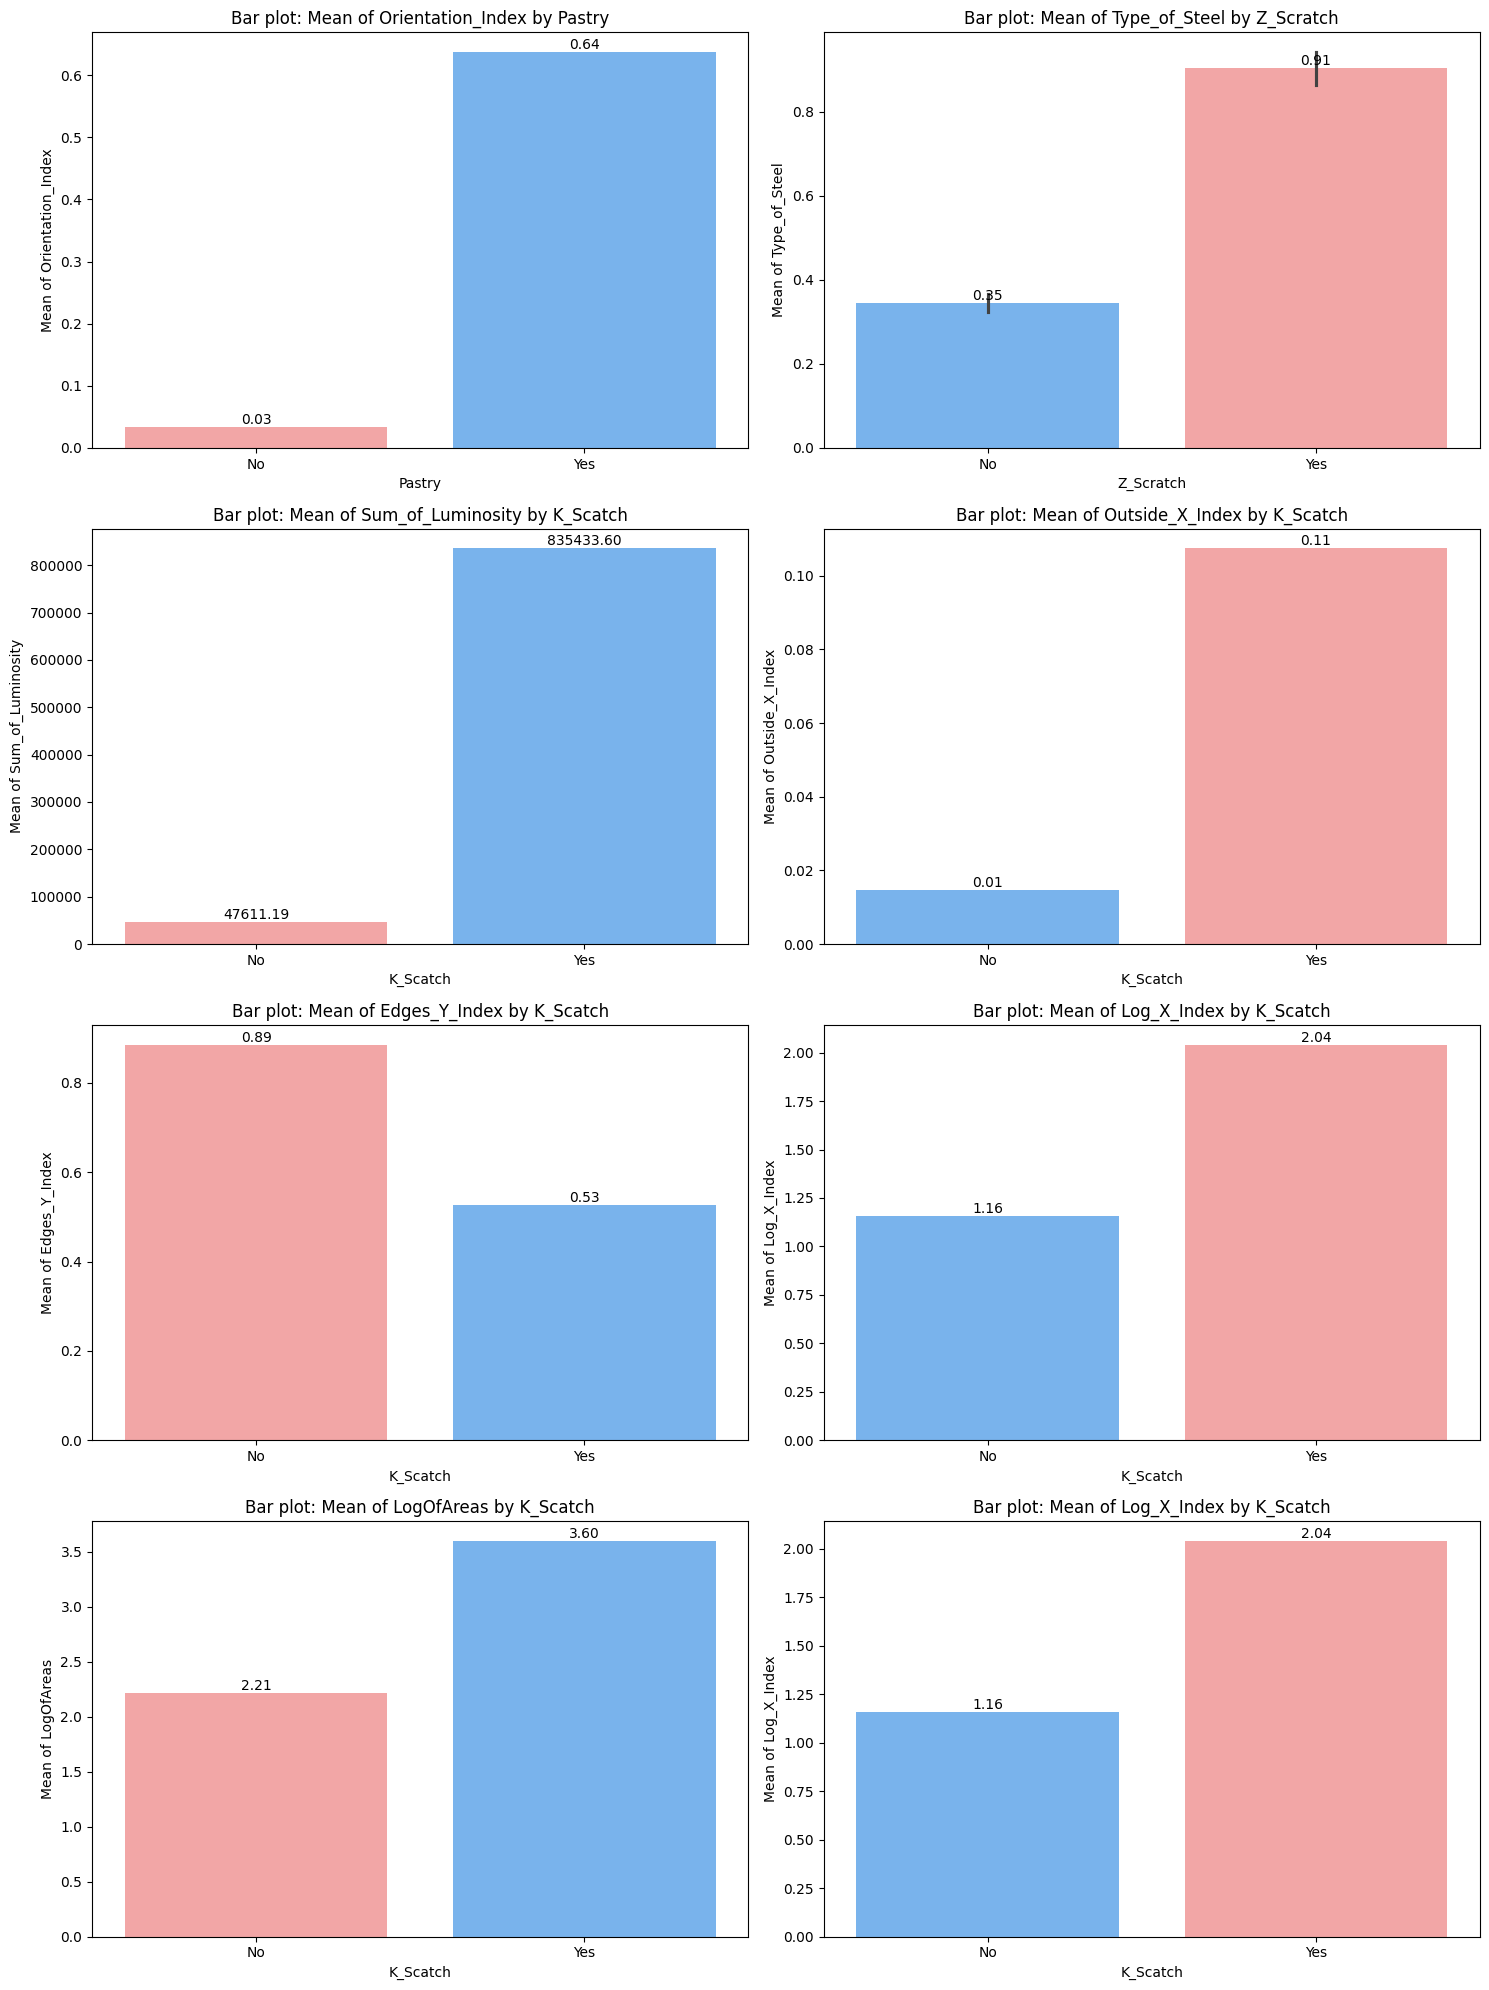

In [ ]:
def plot_multiple_relationships(df, relationships, xFigsize, yFigsize):
    """
    Plot multiple bar plots in a 2-column grid for given independent and dependent variable relationships.
    """
    # Create a figure with 2 columns and enough rows for all relationships
    fig, axes = plt.subplots(len(relationships) // 2 + len(relationships) % 2, 2, figsize=(xFigsize, yFigsize))

    # Flatten the axes array to easily iterate
    axes = axes.flatten()

    # Loop through each relationship and plot the bar plot
    for idx, (independent_var, dependent_var) in enumerate(relationships):
        if idx % 2 == 0:
            palette = ['#ff9999', '#66b3ff']
        else:
            palette = ['#66b3ff', '#ff9999']

        if independent_var == 'Type_of_Steel':
            new_df = df.copy()  # Create a copy of the original DataFrame
            new_df['Type_of_Steel'] = df['Type_of_Steel'].replace({'TypeOfSteel_A300': 0, 'TypeOfSteel_A400': 1})
            ax = sns.barplot(data=new_df, x=dependent_var, y=independent_var, hue=dependent_var, palette=palette, legend=False, ax=axes[idx])
        else:
            # Group by dependent variable and calculate mean of independent variable
            grouped_data = df.groupby(dependent_var)[independent_var].mean().reset_index()
            # Bar plot on respective axes
            ax = sns.barplot(data=grouped_data, x=dependent_var, y=independent_var, hue=dependent_var, palette=palette, legend=False, ax=axes[idx])
        ax.bar_label(ax.containers[0], fmt='%.2f')
        ax.bar_label(ax.containers[1], fmt='%.2f')
        ax.set_xticks([0, 1])
        ax.set_xticklabels(['No', 'Yes'])

        # Titles and labels
        ax.set_title(f'Bar plot: Mean of {independent_var} by {dependent_var}')
        ax.set_xlabel(dependent_var)
        ax.set_ylabel(f'Mean of {independent_var}')

    # Remove any empty subplots
    for i in range(len(relationships), len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

# Example of how to call the function with 6 relationships
relationships = [
    ('Orientation_Index', 'Pastry'),
    ('Type_of_Steel', 'Z_Scratch'),
    ('Sum_of_Luminosity', 'K_Scatch'),
    ('Outside_X_Index', 'K_Scatch'),
    ('Edges_Y_Index', 'K_Scatch'),
    ('Log_X_Index', 'K_Scatch'),
    ('LogOfAreas', 'K_Scatch'),
    ('Log_X_Index', 'K_Scatch')
]

plot_multiple_relationships(df, relationships, 15, 20)


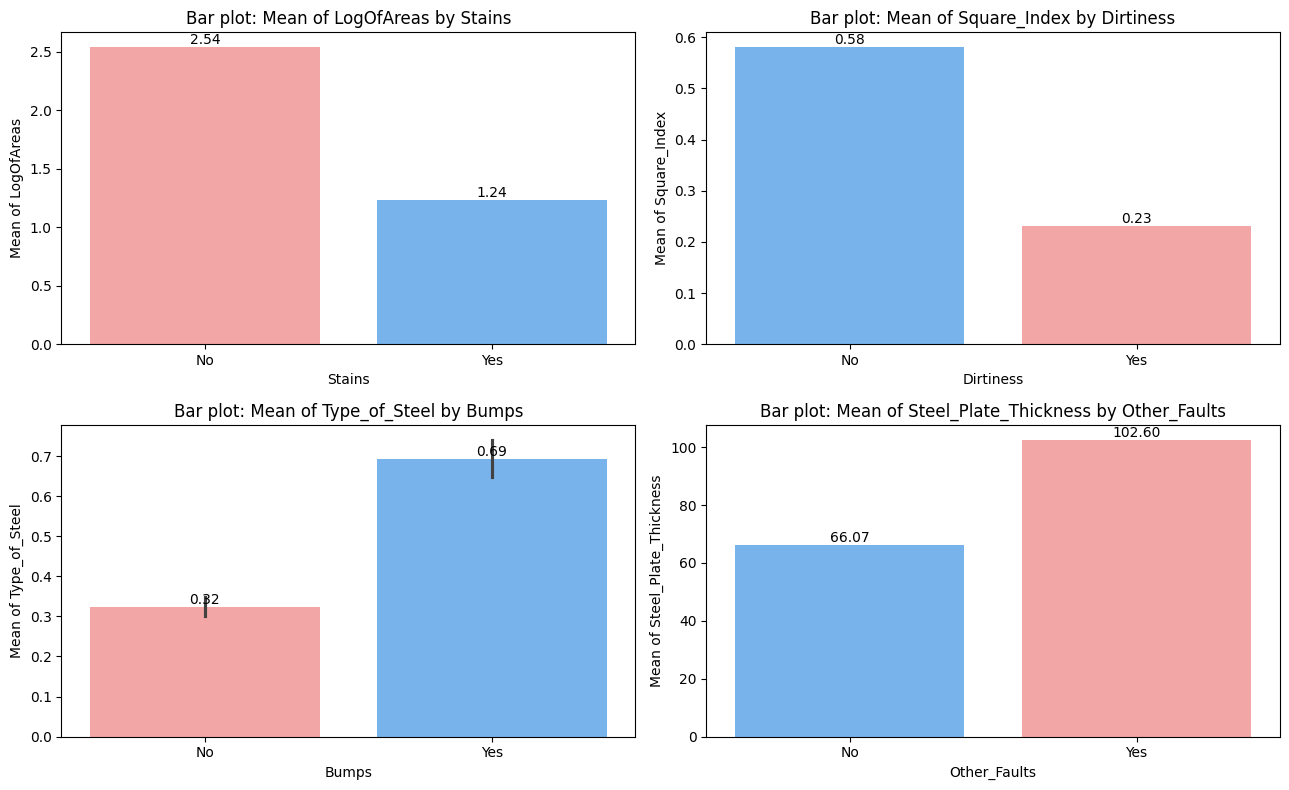

In [ ]:
# Example of how to call the function with 6 relationships
relationships = [
    ('LogOfAreas', 'Stains'),
    ('Square_Index', 'Dirtiness'),
    ('Type_of_Steel', 'Bumps'),
    ('Steel_Plate_Thickness', 'Other_Faults')
]

plot_multiple_relationships(df, relationships, 13, 8)

###Bivariate Analysis

##### Menampilkan persebaran kerusakan

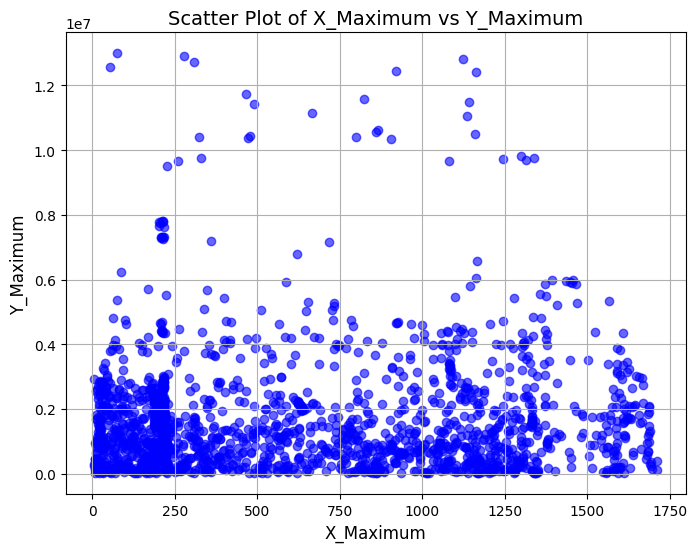

In [ ]:
def visualize_scatter(df, col_x, col_y):
    # Check if the columns exist in the DataFrame
    if col_x in df.columns and col_y in df.columns:
        plt.figure(figsize=(8, 6))

        # Create the scatter plot
        plt.scatter(df[col_x], df[col_y], color='blue', alpha=0.6)

        # Adding labels and title
        plt.title(f'Scatter Plot of {col_x} vs {col_y}', fontsize=14)
        plt.xlabel(col_x, fontsize=12)
        plt.ylabel(col_y, fontsize=12)

        # Show grid
        plt.grid(True)

        # Display the plot
        plt.show()
    else:
        print(f"Columns {col_x} and/or {col_y} not found in the DataFrame")

# Visualize the scatter plot for X_Maximum vs Y_Maximum
visualize_scatter(df, 'X_Maximum', 'Y_Maximum')

Data menunjukkan adanya konsentrasi vertikal pada bagian bawah dari sumbu Y, namun sebaran horizontalnya merata.

Hal ini menunjukkan kerusakan cenderung lebih sering terjadi pada bagian bawah pelat, jenis kesalahan ini dapat memberikan wawasan terhadap kesalahan pelat baja.

##### Memahami kecerahan plat baja terhadap kemungkinan patahan yang dihasilkan

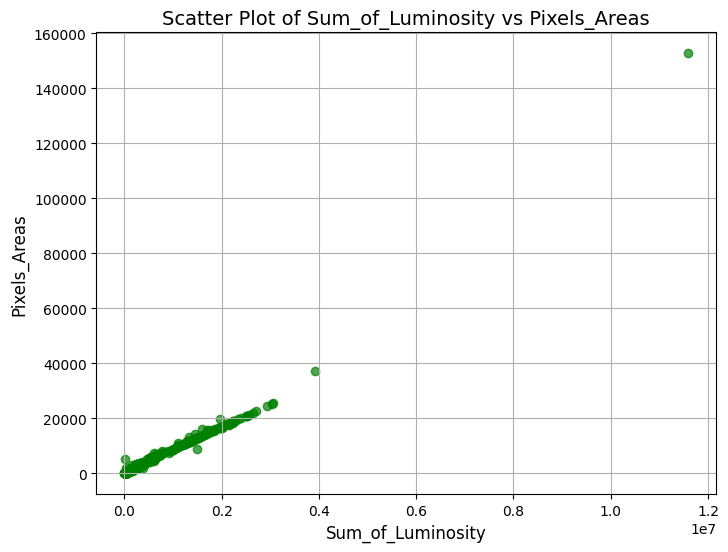

In [ ]:
def visualize_luminosity_vs_defect(df, col_x, col_y):
    # Check if the columns exist in the DataFrame
    if col_x in df.columns and col_y in df.columns:
        plt.figure(figsize=(8, 6))

        # Create the scatter plot
        plt.scatter(df[col_x], df[col_y], color='green', alpha=0.7)

        # Adding labels and title
        plt.title(f'Scatter Plot of {col_x} vs {col_y}', fontsize=14)
        plt.xlabel(col_x, fontsize=12)
        plt.ylabel(col_y, fontsize=12)

        # Show grid for better readability
        plt.grid(True)

        # Display the plot
        plt.show()
    else:
        print(f"Columns {col_x} and/or {col_y} not found in the DataFrame")

# Visualize the scatter plot for Sum_of_Luminosity vs Pixels_Areas
visualize_luminosity_vs_defect(df, 'Sum_of_Luminosity', 'Pixels_Areas')

Konsentrasi pada (0, 0) menunjukkan bahwa ada banyak contoh di mana jumlah luminositas dan area piksel relatif kecil. Hal ini menunjukkan bahwa banyak patahan atau daerah dalam dataset memiliki kecerahan (luminositas) yang rendah dan menempati area yang kecil.

Persebaran nilai secara diagonal, titik-titik menyebar dalam garis yang bergerak dari kiri bawah ke kanan atas. Hal ini mengindikasikan hubungan proporsional antara jumlah luminositas dan area piksel karena yang satu meningkat, maka yang lainnya cenderung meningkat juga.

Penyebaran yang meningkat ke arah kanan atas menunjukkan bahwa ketika patahan atau wilayah bertambah luas, terdapat lebih banyak variasi dalam kecerahannya, dan beberapa di antaranya lebih terang daripada yang lain.

##### Membandingkan jumlah kesalahan pada setiap tipe baja

In [ ]:
def visualize_crosstab(df, col1, col2, normalize=False):
    if col1 in df.columns and col2 in df.columns:
        # Create cross-tabulation
        if normalize:
            # Normalize to get percentages
            crosstab_result = pd.crosstab(df[col1], df[col2], normalize='index') * 100
            print(f'Jumlah kerusakan yang terjadi pada tipe baja: {col1} sebanyak {crosstab_result[0][1]} %')
            print(f'Jumlah kerusakan yang terjadi pada tipe baja: {col2} sebanyak {crosstab_result[1][0]} %')
        else:
            # Just counts
            crosstab_result = pd.crosstab(df[col1], df[col2])
            print(f'Jumlah kerusakan yang terjadi pada tipe baja: {col1} sebanyak {crosstab_result[0][1]} pelat baja')
            print(f'Jumlah kerusakan yang terjadi pada tipe baja: {col2} sebanyak {crosstab_result[1][0]} pelat baja')
    else:
        print(f"Columns {col1} and/or {col2} not found in the DataFrame")

# Visualize the cross-tabulation for TypeOfSteel_A300 vs TypeOfSteel_A400 with counts
visualize_crosstab(df, 'TypeOfSteel_A300', 'TypeOfSteel_A400', normalize=False)
print(" ")
# Visualize the cross-tabulation for TypeOfSteel_A300 vs TypeOfSteel_A400 with percentages
visualize_crosstab(df, 'TypeOfSteel_A300', 'TypeOfSteel_A400', normalize=True)


Columns TypeOfSteel_A300 and/or TypeOfSteel_A400 not found in the DataFrame
 
Columns TypeOfSteel_A300 and/or TypeOfSteel_A400 not found in the DataFrame


###Multivariate Analysis

##### Menghitung analis faktor laten dari setiap atribute

In [ ]:
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler

df_fa = df.copy()
df_fa.drop(columns=['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults'], inplace=True)

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_fa)

# Number of factors to extract
n_factors = 2  # Adjust based on your requirements or use methods like scree plot to determine the number of factors

factor_analysis = FactorAnalysis(n_components=n_factors)
factors = factor_analysis.fit_transform(df_scaled)

# Factor loadings
loadings = factor_analysis.components_.T
loadings_df = pd.DataFrame(loadings, columns=[f'Factor_{i+1}' for i in range(n_factors)], index=df_fa.columns)
print("Factor Loadings:")
print(loadings_df)

# Transformed factors
factors_df = pd.DataFrame(factors, columns=[f'Factor_{i+1}' for i in range(n_factors)])
print("\nTransformed Factors:")
print(factors_df.head())

Factor Loadings:
                       Factor_1  Factor_2
X_Minimum                 -0.45      0.07
X_Maximum                 -0.34      0.02
Y_Minimum                  0.05     -0.08
Y_Maximum                  0.05     -0.08
Pixels_Areas               0.66      0.04
X_Perimeter                0.58      0.06
Y_Perimeter                0.30      0.13
Sum_of_Luminosity          0.73      0.03
Minimum_of_Luminosity     -0.65     -0.12
Maximum_of_Luminosity      0.04     -0.18
Length_of_Conveyer        -0.22      0.06
Steel_Plate_Thickness     -0.20      0.23
Edges_Index               -0.40     -0.09
Empty_Index                0.43     -0.02
Square_Index              -0.16     -0.22
Outside_X_Index            0.77     -0.27
Edges_X_Index             -0.42     -0.69
Edges_Y_Index             -0.73      0.49
Outside_Global_Index      -0.22      0.80
LogOfAreas                 0.98      0.14
Log_X_Index                0.95     -0.31
Log_Y_Index                0.82      0.56
Orientation_Index

Hasil Analisis Faktor yang diperolah memberikan wawasan tentang faktor laten yang mendasari yang menjelaskan korelasi yang diamati di antara variabel-variabel.

Faktor_1 sangat terkait dengan fitur-fitur area dan luminositas sesar, seperti Pixels_Areas, Y_Perimeter, dan Log_Y_Index.

Faktor_2 terkait dengan fitur-fitur yang berhubungan dengan bentuk dan pengindeksan, seperti Outside_X_Index, Log_X_Index, dan Edges_X_Index.

Penjelasan terhadap faktor 1 dan faktor 2:
Faktor 1: Mencerminkan dimensi ukuran dan intensitas, terkait dengan area piksel yang lebih besar dan luminositas yang lebih tinggi.

Faktor 2: Mencerminkan dimensi bentuk dan pengindeksan, terkait dengan karakteristik struktural dan spasial.

##Preprocessing Tahap 2

###Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Inisialisasi LabelEncoder
label_encoders = {}

# Pastikan df adalah salinan DataFrame atau gunakan .copy() jika perlu
df = df.copy()

# Lakukan label encoding pada setiap kolom variabel dependen
for column in df.columns:
    le = LabelEncoder()
    # Gunakan .loc untuk menghindari peringatan
    df.loc[:, column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [ ]:
df.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults,Type_of_Steel
0,41,42,312,312,242,15,43,1075,66,25,70,5,112.00,127.00,130.00,12.00,388.00,647.00,2.00,242.00,6.00,43.00,821.00,160.00,168.00,1,0,0,0,0,0,0,1
1,430,455,1574,1575,94,8,29,570,74,40,70,5,1155.00,471.00,158.00,6.00,507.00,582.00,2.00,94.00,4.00,28.00,796.00,566.00,82.00,1,0,0,0,0,0,0,1
2,534,559,1157,1157,57,6,18,365,89,42,45,8,1373.00,368.00,256.00,7.00,690.00,557.00,2.00,57.00,4.00,17.00,710.00,814.00,50.00,1,0,0,0,0,0,0,1
3,546,572,399,399,160,11,44,933,89,43,13,22,1108.00,710.00,111.00,17.00,435.00,647.00,2.00,160.00,5.00,44.00,837.00,664.00,149.00,1,0,0,0,0,0,0,0
4,807,842,501,502,556,58,196,1532,28,43,13,17,177.00,733.00,29.00,86.00,236.00,630.00,2.00,556.00,15.00,196.00,904.00,411.00,387.00,1,0,0,0,0,0,0,0


###Normalisasi

In [ ]:
# Menggabungkan kolom-kolom label menjadi sebuah kolom 'label'
label_columns = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']
df[label_columns] = df[label_columns].replace({'No': 0, 'Yes': 1})
df, label_info = combine_labels_to_unique_integer(df, label_columns, 'label')
label_info

{0: 'Other_Faults',
 1: 'Bumps',
 2: 'Dirtiness',
 3: 'Stains',
 4: 'K_Scatch',
 5: 'Z_Scratch',
 6: 'Pastry'}

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Variabel independen
X_columns = [
    'X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum',
    'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter',
    'Sum_of_Luminosity', 'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer', 'Type_of_Steel', 'Steel_Plate_Thickness', 'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index', 'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas', 'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index', 'SigmoidOfAreas'
]

# Variabel dependen
y_columns = [
    'label'
]

# Memilih kolom-kolom untuk normalisasi
X = df[X_columns]

# Inisialisasi StandardScaler
scaler = StandardScaler()

# Fit dan transform data
X_scaled = scaler.fit_transform(X)

# Membuat DataFrame dari data yang telah dinormalisasi
df_scaled_X = pd.DataFrame(X_scaled, columns=X_columns)

# Jika ingin menyertakan variabel dependen dalam DataFrame yang sama
df_scaled = pd.concat([df_scaled_X, df[y_columns].reset_index(drop=True)], axis=1)

###Splitting Dataset

In [ ]:
from sklearn.model_selection import train_test_split

X = df[['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum',
    'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter',
    'Sum_of_Luminosity', 'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer', 'Type_of_Steel', 'Steel_Plate_Thickness', 'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index', 'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas', 'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index', 'SigmoidOfAreas']]
y = df[['label']]

# Bagi data menjadi data pelatihan, data pengujian, dan data validaso
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

In [ ]:
print(f'Total data X_train adalah {len(X_train)} data')
print(f'Total data X_test adalah {len(X_test)} data')
print(" ")
print(f'Total data y_train adalah {len(y_train)} data')
print(f'Total data y_test adalah {len(y_test)} data')
print(" ")
print(f'Total data X_val adalah {len(X_val)} data')
print(f'Total data y_val adalah {len(y_val)} data')

Total data X_train adalah 1164 data
Total data X_test adalah 389 data
 
Total data y_train adalah 1164 data
Total data y_test adalah 389 data
 
Total data X_val adalah 388 data
Total data y_val adalah 388 data


###Oversampling

In [ ]:
!pip install imbalanced-learn --quiet

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter

# Initialize SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)  # 'auto' will balance all classes

# Fit and resample the training data
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Check the distribution of classes after resampling
print("Original class distribution:", Counter(y_train))
print("Resampled class distribution:", Counter(y_resampled))

Original class distribution: Counter({'label': 1})
Resampled class distribution: Counter({'label': 1})


##Modelling with Machine Learning

###Select Model (Random Forest and XGBoost)

In [ ]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

###Hyperparameter Tuning + Cross validation

##### For Development

In [ ]:
# random_grid_xgb = {
#     'max_depth': [2],  # Smallest depth
#     'learning_rate': [0.01],  # Smallest learning rate
#     'subsample': [0.1],  # Smallest value
#     'colsample_bytree': [0.5],  # Smallest value
#     'colsample_bylevel': [0.5],  # Smallest value
#     'n_estimators': [50]  # Smallest number of estimators
# }

# xgb_random = RandomizedSearchCV(
#     estimator=xgb.XGBClassifier(),
#     param_distributions=random_grid_xgb,
#     scoring='accuracy',
#     n_iter=1,  # Use only one iteration for fast results
#     n_jobs=4,
#     verbose=1,
#     error_score='raise'
# )

##### For Production

In [ ]:
random_grid_xgb = {'max_depth': [2, 3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'subsample': np.arange(0.1, 1.0, 0.1),
    'colsample_bytree': np.arange(0.5, 1.0, 0.1),
    'colsample_bylevel': np.arange(0.5, 1.0, 0.1),
    'n_estimators': [50, 100, 250, 500]
}

xgb_random = RandomizedSearchCV(
    estimator = xgb.XGBClassifier(),
    param_distributions = random_grid_xgb,
    scoring = 'accuracy',
    n_iter = 25,
    n_jobs = 4,
    verbose = 1,
    cv = 5,
    error_score = 'raise'
)

##### List of model

In [ ]:
models = [
    ('xgboost', xgb_random),
]

###Model Training

In [ ]:
import time
import joblib
from sklearn.metrics import accuracy_score

def train_and_time(model_information, model, model_name, X_train, y_train, save_model=False):
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    training_time = end_time - start_time

    # Predict on the training data
    y_train_pred = model.predict(X_train)
    accuracy = accuracy_score(y_train, y_train_pred)

    # Save the fitted model to a file
    if save_model:
        joblib_file = f"trained_{model_name}.pkl"
        joblib.dump(model, joblib_file)
        print("Model has been saved to", joblib_file)

    model_information['ct'].append(training_time)
    model_information['name'].append(model_name)
    model_information['model'].append(model)

    return model_information

In [ ]:
# Initialize evaluation information
model_information = {'name': [], 'ct': [], 'model': []}

# Loop through models and call the function
for model_name, model in models:
    model_information = train_and_time(model_information, model, model_name, X_train, y_train, save_model=True)

# Print train information
print("train Information:")
for name, time, model in zip(model_information['name'], model_information['ct'], model_information['model']):
    print(f"Model: {name}, Training Time: {time:.2f} seconds")

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Model has been saved to trained_xgboost.pkl
train Information:
Model: xgboost, Training Time: 28.04 seconds


In [ ]:
!pip install tabulate --quiet

In [ ]:
from tabulate import tabulate

# Prepare table data
table_data = []
headers = ["Index"]  # Add "Index" header for the row number

# Add headers based on dictionary keys except 'model'
for key in model_information:
    if key != 'model':
        headers.append(key.capitalize())

# Populate table data
for i in range(len(model_information['ct'])):  # Assuming all lists are of equal length
    row = [i + 1]  # Index column, starting from 1
    for key in model_information:
        if key != 'model':
            row.append(model_information[key][i])
    table_data.append(row)

# Print table
print(tabulate(table_data, headers=headers, tablefmt='grid'))

+---------+---------+---------+
|   Index | Name    |      Ct |
+=========+=========+=========+
|       1 | xgboost | 28.0447 |
+---------+---------+---------+


###Validate the Model

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time

def validate_and_testing(evaluation_information, model, name, X, y):
    start_time = time.time()
    prediction = model.predict(X)
    end_time = time.time()
    mod_time = end_time - start_time

    evaluation_information['ct'].append(mod_time)
    evaluation_information['name'].append(name)

    acc = accuracy_score(y, prediction)
    evaluation_information['acc'].append(acc)

    # Use zero_division parameter to handle undefined precision
    precision = precision_score(y, prediction, pos_label=1, average='weighted', zero_division=0)
    evaluation_information['prec'].append(precision)

    # Use zero_division parameter to handle undefined recall
    recall_sensitivity = recall_score(y, prediction, pos_label=1, average='weighted', zero_division=0)
    evaluation_information['recall'].append(recall_sensitivity)

    f1 = f1_score(y, prediction, pos_label=1, average='weighted')
    evaluation_information['f1'].append(f1)

    evaluation_information['conf_m'].append(prediction)

    return evaluation_information

##### Train Information

In [ ]:
# Example of how to initialize the evaluation_information dictionary
train_information = {
    'ct': [],  # To store computation time
    'name': [],  # To store model names
    'acc': [],  # To store accuracy scores
    'prec': [],  # To store precision scores
    'recall': [],  # To store recall scores
    'f1': [],  # To store F1 scores
    'conf_m': []  # To store predictions
}

# Loop through models and call the function
for model_name, model in models:
    evaluation_information = validate_and_testing(
        train_information,
        model,
        model_name,  # or any model name
        X_val,
        y_val
    )

In [ ]:
# Prepare table data
table_data = []
headers = ["Index"]  # Add "Index" header for the row number

# Add headers based on dictionary keys except 'model'
for key in evaluation_information:
    if key != 'model':
        headers.append(key.capitalize())

# Populate table data
for i in range(len(evaluation_information['ct'])):  # Assuming all lists are of equal length
    row = [i + 1]  # Index column, starting from 1
    for key in evaluation_information:
        if key != 'conf_m':
            row.append(evaluation_information[key][i])
    table_data.append(row)

# Print table
print("Train Information")
print(tabulate(table_data, headers=headers, tablefmt='grid'))

Train Information
+---------+---------+---------+----------+----------+----------+----------+
|   Index |      Ct | Name    |      Acc |     Prec |   Recall |       F1 |
+=========+=========+=========+==========+==========+==========+==========+
|       1 | 0.01511 | xgboost | 0.778351 | 0.784402 | 0.778351 | 0.779165 |
+---------+---------+---------+----------+----------+----------+----------+


##### Testing Information

In [ ]:
# Example of how to initialize the evaluation_information dictionary
evaluation_information = {
    'ct': [],  # To store computation time
    'name': [],  # To store model names
    'acc': [],  # To store accuracy scores
    'prec': [],  # To store precision scores
    'recall': [],  # To store recall scores
    'f1': [],  # To store F1 scores
    'conf_m': []  # To store predictions
}

# Loop through models and call the function
for model_name, model in models:
    evaluation_information = validate_and_testing(
        evaluation_information,
        model,
        model_name,  # or any model name
        X_test,
        y_test
    )

In [ ]:
# Prepare table data
table_data = []
headers = ["Index"]  # Add "Index" header for the row number

# Add headers based on dictionary keys except 'model'
for key in evaluation_information:
    if key != 'model':
        headers.append(key.capitalize())

# Populate table data
for i in range(len(evaluation_information['ct'])):  # Assuming all lists are of equal length
    row = [i + 1]  # Index column, starting from 1
    for key in evaluation_information:
        if key != 'conf_m':
            row.append(evaluation_information[key][i])
    table_data.append(row)

# Print table
print("Testing Information")
print(tabulate(table_data, headers=headers, tablefmt='grid'))

Testing Information
+---------+-----------+---------+----------+----------+----------+---------+
|   Index |        Ct | Name    |      Acc |     Prec |   Recall |      F1 |
+=========+===========+=========+==========+==========+==========+=========+
|       1 | 0.0106897 | xgboost | 0.766067 | 0.763924 | 0.766067 | 0.76408 |
+---------+-----------+---------+----------+----------+----------+---------+


Model Testing

###Confusion Matrix

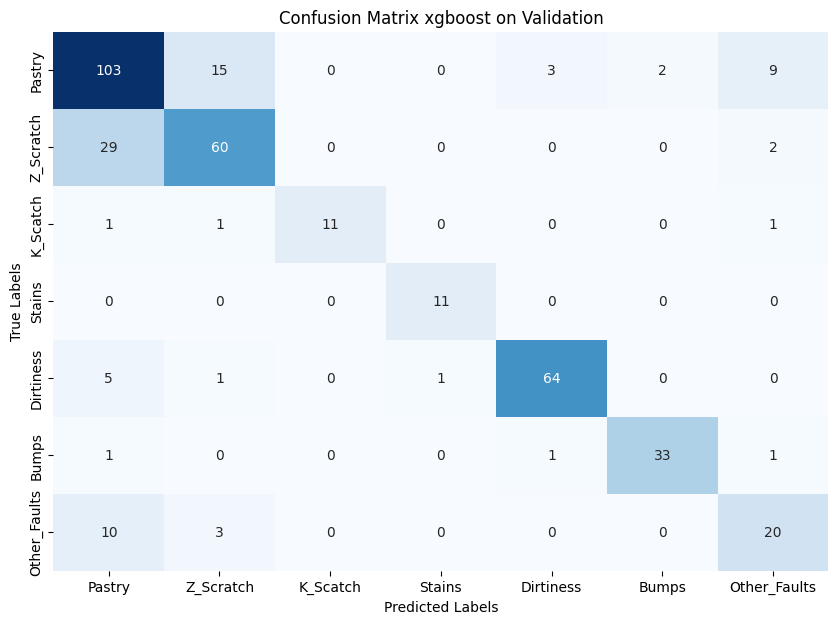

In [ ]:
from sklearn.metrics import confusion_matrix

data = train_information['conf_m'][0]
# Generate confusion matrix
cm = confusion_matrix(y_val['label'].values, data)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=label_columns,
            yticklabels=label_columns)
name = evaluation_information['name'][i]
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title(f'Confusion Matrix {name} on Validation')  # Add index to the title if needed
plt.show()

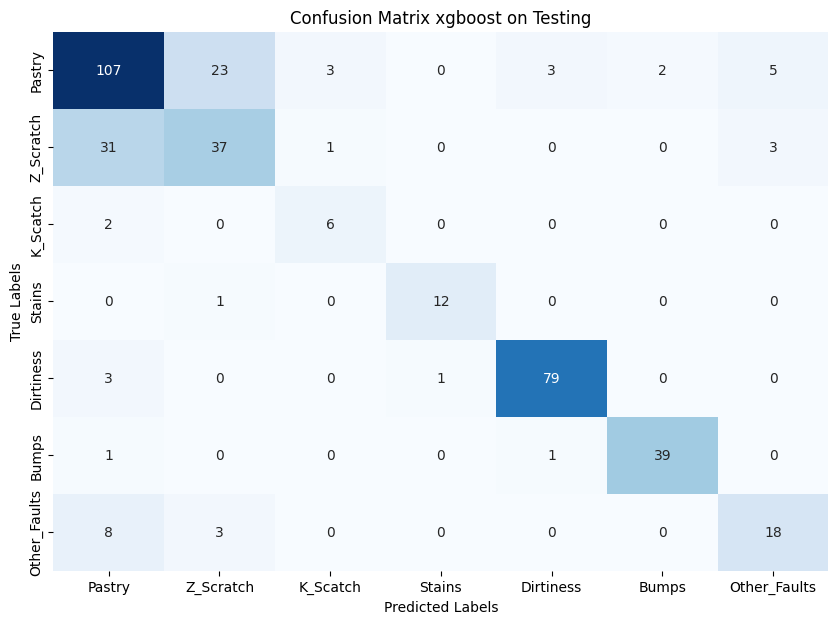

In [ ]:
data = evaluation_information['conf_m'][0]
# Generate confusion matrix
cm = confusion_matrix(y_test['label'].values, data)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=label_columns,
            yticklabels=label_columns)
name = evaluation_information['name'][i]
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title(f'Confusion Matrix {name} on Testing')  # Add index to the title if needed
plt.show()